In [94]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.preprocessing import OneHotEncoder 
import random
import numpy as np
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


from sklearn.metrics import f1_score, precision_score
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
 
import random
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch import Tensor
import torch.optim as optim
import torch.nn.functional as Fnc
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from IPython.core.debugger import set_trace
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib
from torch.autograd.variable import Variable
import sys
#################################################

# Loading Dataset

In [105]:
############################   DATA SET LOAD  #########################


### for sorting the the labeled data based on support
def sortingFunction(data):
    return data.shape[0]


#### label coding for nominal values
def label_coding(label):
    dataset[label]= label_encoder.fit_transform(dataset[label]) 
    dataset[label].unique()
    
### splitting dataset 
def crop_dataset(len_dataset):
    for label in range(len_dataset):
        temp_dataframe=dataset[dataset['Label']==label]
        try:
            if temp_dataframe.shape[0]>8:
                _ ,temp_dataframe = train_test_split(temp_dataframe,test_size =.25)
            temp_train ,temp_test = train_test_split(temp_dataframe,test_size=0.25)
            list_train.append(temp_train)
            list_test.append(temp_test)
        except:
            print("Error for "+str(label))
        
### producing new samples        
def new_sample_generation(x,y,z):
    need=500-x if x<=500 else 0
    #print("n_sample: "+str(x)+" max_sample: "+str(y)+" need_to_create: "+str(need))
    
    
### importing dataset
dataset = pd.read_csv('/content/merge_labeled.csv')

### label encoding
label_encoder = preprocessing.LabelEncoder() 
label_coding('Flow ID')
label_coding('Src IP')
label_coding('Dst IP')
label_coding('Timestamp')
label_coding('Label')

### extracting features
X=dataset.iloc[:,:-1]
X=X.values

print("+-inf",sum(np.isinf(X)))
print("inf",sum(np.isposinf(X)))
print("-inf",sum(np.isneginf(X)))
print("nan",sum(np.isnan(X)))
print("fin",sum(np.isfinite(X)))

X = np.where(np.isnan(X), 0, X)
X = np.where(np.isposinf(X), 0, X)
X = np.where(np.isneginf(X), 0, X)


scaler = preprocessing.StandardScaler()
scaler.fit(X)
X=scaler.transform(X)



################################   PCA #####################################################
### dimention reduction

number_of_components=83
pca = PCA(n_components=number_of_components)
columns_array=[]
for i in range (number_of_components):
    columns_array.append("principal_Component"+str(i+1))

principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
              , columns = columns_array)

finalDf = pd.concat([principalDf, dataset[['Label']]], axis = 1)
dataset=finalDf

#############################  CROP DATA SET up to 15 Labels  ###########################
len_dataset= len(dataset.Label.unique())
list_train,list_test=[],[]
    
crop_dataset(len_dataset)

list_train.sort(key=sortingFunction,reverse=True)
list_test.sort(key=sortingFunction,reverse=True)

train_dataframe=list_train[0]
test_dataframe=list_test[0]


# for taking top 15 labels
labels_to_consider = 38
max_samples = list_train[0].shape[0]

for i in range(1,labels_to_consider):
    new_sample_generation(len(list_train[i]),max_samples,int((max_samples-len(list_train[i]))*.5))
    train_dataframe=pd.concat([train_dataframe,list_train[i]])
    test_dataframe=pd.concat([test_dataframe,list_test[i]])
partial_dataframe=pd.concat([train_dataframe,test_dataframe])

#print(len(test_dataframe.label.unique()))

####################################  Generating Numpy Array X,y ###################

x_train=np.array(train_dataframe.iloc[:,:-1])
x_test=np.array(test_dataframe.iloc[:,:-1])
y_train=np.array(train_dataframe.iloc[:,-1])
y_test=np.array(test_dataframe.iloc[:,-1])   

+-inf [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 13  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
inf [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 13  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
-inf [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
nan [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
fin [41505 41505 41505 41505 41505 41505 41505 41

In [106]:
### for extracting data from classification report
def CR_mat(y_true,y_pred):
    import re
    from sklearn.metrics import classification_report
    report=classification_report(y_true, y_pred)
    classification_list=[]
    lines=report.split("\n")[2:-5]
    for line in lines:
        line=re.sub(' +', ' ', line)
        words=line.split(" ")
        if len(words)<5:
            continue
        print(words)
        classification_list.append(words[1:])
    classification_mat=np.array(classification_list).astype(np.float)
    return classification_mat

In [97]:
# Intrusion Detection System

In [107]:
#####################   IDS ANN Model   ########################

class ANN(nn.Module):
   
    def __init__(self):
        super(ANN,self).__init__()
        
        nodes_layer_0 = 83
        nodes_layer_1 = 50
        nodes_layer_2 = 50
        nodes_layer_3 = 38
       
        # input has two features and
        self.layer1 = nn.Linear(nodes_layer_0,nodes_layer_1)
        self.layer2 = nn.Linear(nodes_layer_1,nodes_layer_2)
        self.layer3 = nn.Linear(nodes_layer_2,nodes_layer_3)

    #forward propagation    
    def forward(self,x):
        #output of layer 1       
        z1 = self.layer1(x)
        a1 = Fnc.tanh(z1)
        # output of layer 2
        z2 = self.layer2(a1)
        a2 = Fnc.tanh(z2)
        z3 = self.layer3(a2)
        
        return z3


In [108]:

####################  DATA LOADING   #####################

x_train = torch.from_numpy(x_train).type(torch.FloatTensor)
x_test = torch.from_numpy(x_test).type(torch.FloatTensor)

y_train = torch.from_numpy(y_train).type(torch.LongTensor)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

Training_data = [(x, y) for x, y in zip(x_train,y_train)]
Testing_data = [(x, y) for x, y in zip(x_test,y_test)]
        
class Data_Loader():
    
    def __init__(self,data_list):       
        self.data=data_list
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        img = self.data[index][0]
        img_tensor = Tensor(img).float()
        label = self.data[index][1]
        return (img_tensor, label)

#######################  Train and Test Data Set  ##########################

Training_DataSet=Data_Loader(Training_data)
Testing_DataSet=Data_Loader(Testing_data)

train_loader = DataLoader(dataset=Training_DataSet, batch_size=5000, shuffle=True)
testing_loader = DataLoader(dataset=Testing_DataSet, batch_size=len(Testing_DataSet), shuffle=True)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


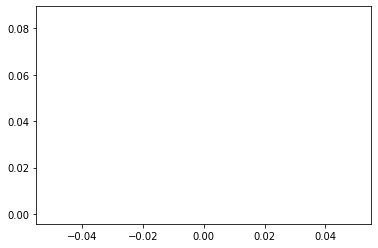

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.01', '0.08', '0.02', '26']
['', '9', '0.01', '0.01', '0.01', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.49', '0.05', '0.09', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.00', '0.00', '0.00', '201']
['', '18', '0.00', '0.00', '0.00', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

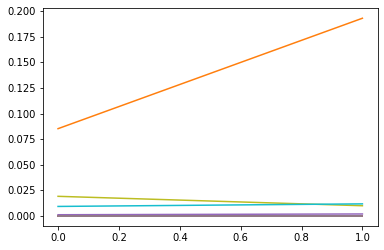

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.01', '0.04', '0.01', '26']
['', '9', '0.01', '0.01', '0.01', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.14', '0.31', '0.19', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.00', '0.00', '0.00', '201']
['', '18', '0.00', '0.00', '0.00', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

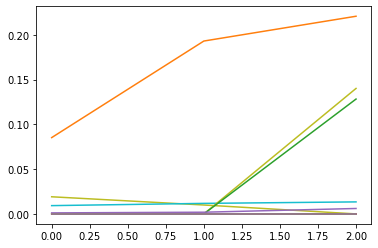

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.01', '0.01', '0.01', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.14', '0.50', '0.22', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.00', '0.00', '0.00', '201']
['', '18', '1.00', '0.08', '0.14', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


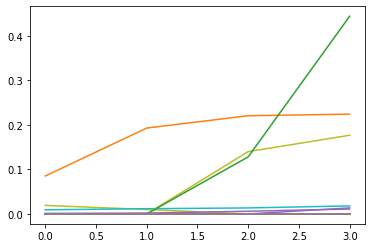

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '1.00', '0.01', '0.01', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.03', '0.01', '0.02', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.14', '0.55', '0.22', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.00', '0.00', '0.00', '201']
['', '18', '0.81', '0.10', '0.18', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

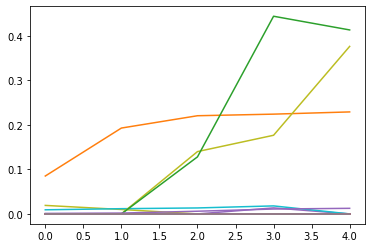

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.15', '0.50', '0.23', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.00', '0.00', '0.00', '201']
['', '18', '0.84', '0.24', '0.38', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

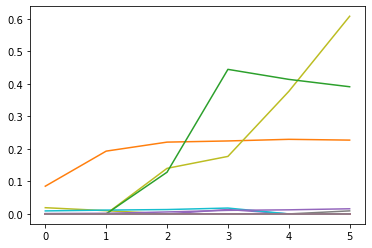

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.15', '0.46', '0.23', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.08', '0.00', '0.01', '201']
['', '18', '0.82', '0.48', '0.61', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

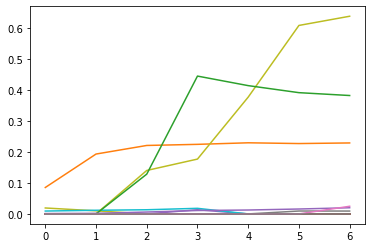

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.15', '0.45', '0.23', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.06', '0.00', '0.01', '201']
['', '18', '0.72', '0.57', '0.64', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

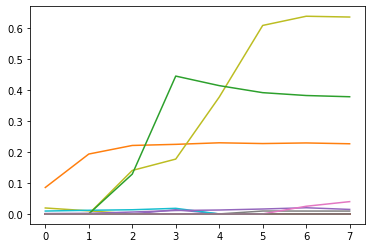

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.15', '0.45', '0.23', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.06', '0.00', '0.01', '201']
['', '18', '0.68', '0.59', '0.63', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


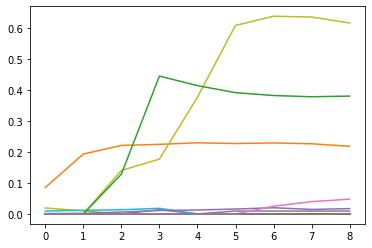

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.14', '0.44', '0.22', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.06', '0.00', '0.01', '201']
['', '18', '0.63', '0.61', '0.62', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

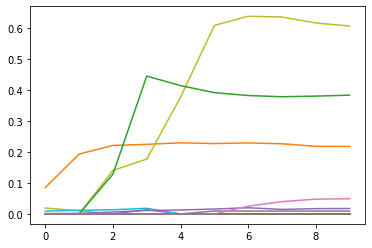

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.14', '0.44', '0.22', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.06', '0.00', '0.01', '201']
['', '18', '0.59', '0.63', '0.61', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

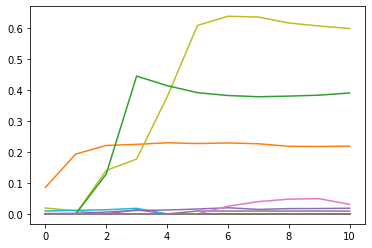

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.15', '0.44', '0.22', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.06', '0.00', '0.01', '201']
['', '18', '0.56', '0.64', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


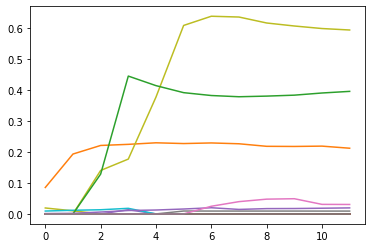

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.14', '0.42', '0.21', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.06', '0.00', '0.01', '201']
['', '18', '0.53', '0.67', '0.59', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

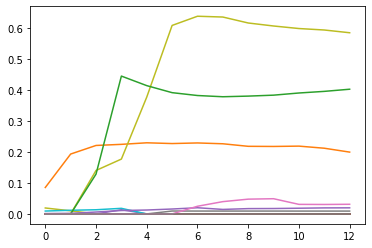

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.13', '0.39', '0.20', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.06', '0.00', '0.01', '201']
['', '18', '0.50', '0.70', '0.58', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

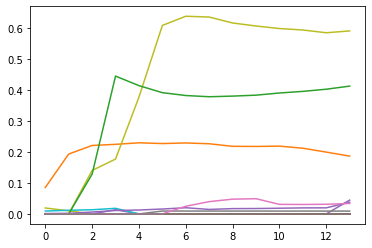

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.13', '0.36', '0.19', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.07', '0.03', '0.04', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.06', '0.00', '0.01', '201']
['', '18', '0.50', '0.73', '0.59', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


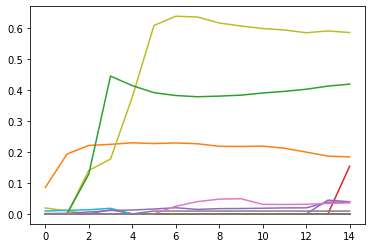

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '1.00', '0.08', '0.15', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.12', '0.35', '0.18', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.05', '0.03', '0.04', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.06', '0.00', '0.01', '201']
['', '18', '0.48', '0.75', '0.58', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

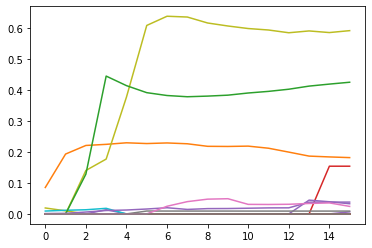

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '1.00', '0.08', '0.15', '12']
['', '4', '0.17', '0.00', '0.01', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.12', '0.34', '0.18', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.03', '0.03', '0.03', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.06', '0.00', '0.01', '201']
['', '18', '0.47', '0.78', '0.59', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

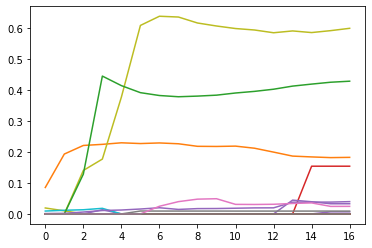

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '1.00', '0.08', '0.15', '12']
['', '4', '0.17', '0.00', '0.01', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.12', '0.34', '0.18', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.03', '0.03', '0.03', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.05', '0.00', '0.01', '201']
['', '18', '0.47', '0.81', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


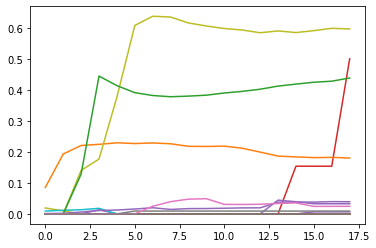

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '1.00', '0.33', '0.50', '12']
['', '4', '0.17', '0.00', '0.01', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.12', '0.34', '0.18', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.03', '0.03', '0.03', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.05', '0.00', '0.01', '201']
['', '18', '0.46', '0.84', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

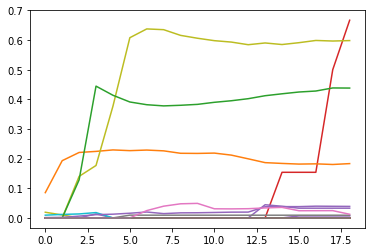

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '1.00', '0.50', '0.67', '12']
['', '4', '0.17', '0.00', '0.01', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.13', '0.34', '0.18', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.03', '0.03', '0.03', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.05', '0.00', '0.01', '201']
['', '18', '0.46', '0.85', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

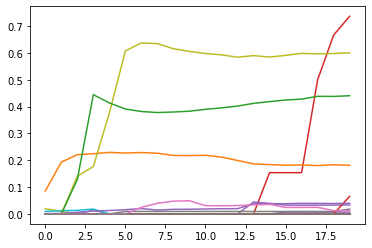

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '1.00', '0.58', '0.74', '12']
['', '4', '0.14', '0.00', '0.01', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.12', '0.34', '0.18', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.03', '0.03', '0.03', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.10', '0.01', '0.02', '201']
['', '18', '0.46', '0.86', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.04', '0.07', '57']
['', '24', '0.00', '0.0

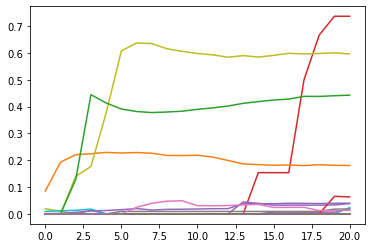

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '1.00', '0.58', '0.74', '12']
['', '4', '0.25', '0.01', '0.02', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.07', '0.01', '0.02', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.12', '0.34', '0.18', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.05', '0.03', '0.04', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.09', '0.01', '0.02', '201']
['', '18', '0.46', '0.86', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.33', '0.04', '0.06', '57']
['', '24', '0.00', '0.0

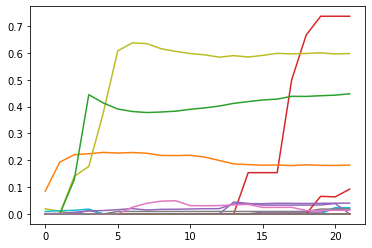

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '1.00', '0.58', '0.74', '12']
['', '4', '0.18', '0.01', '0.02', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.06', '0.01', '0.02', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.12', '0.34', '0.18', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.08', '0.01', '0.02', '201']
['', '18', '0.46', '0.86', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.38', '0.05', '0.09', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


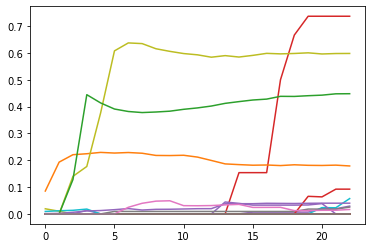

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '1.00', '0.58', '0.74', '12']
['', '4', '0.10', '0.02', '0.03', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.09', '0.04', '0.06', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.12', '0.32', '0.18', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.08', '0.01', '0.03', '201']
['', '18', '0.46', '0.87', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.38', '0.05', '0.09', '57']
['', '24', '0.00', '0.0

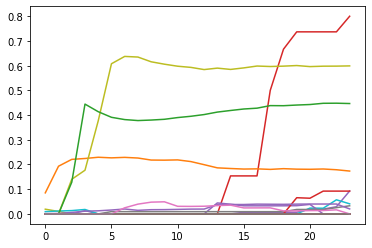

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '1.00', '0.67', '0.80', '12']
['', '4', '0.15', '0.07', '0.09', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.07', '0.03', '0.04', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.12', '0.30', '0.17', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.10', '0.02', '0.03', '201']
['', '18', '0.46', '0.87', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.38', '0.05', '0.09', '57']
['', '24', '0.00', '0.0

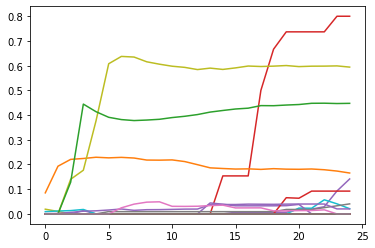

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '1.00', '0.67', '0.80', '12']
['', '4', '0.17', '0.12', '0.14', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.04', '0.01', '0.02', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.12', '0.27', '0.17', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.11', '0.02', '0.04', '201']
['', '18', '0.45', '0.87', '0.59', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.38', '0.05', '0.09', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


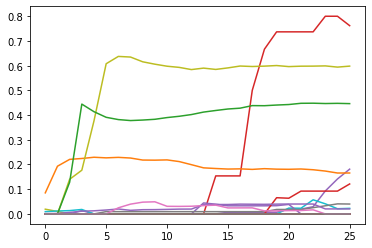

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.89', '0.67', '0.76', '12']
['', '4', '0.18', '0.18', '0.18', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.06', '0.01', '0.02', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.12', '0.25', '0.17', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.10', '0.02', '0.04', '201']
['', '18', '0.45', '0.88', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.44', '0.07', '0.12', '57']
['', '24', '0.00', '0.0

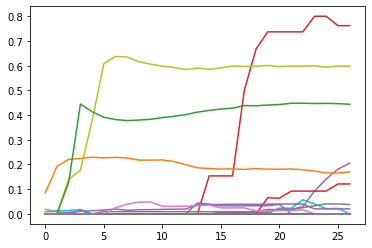

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.89', '0.67', '0.76', '12']
['', '4', '0.19', '0.23', '0.21', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.13', '0.24', '0.17', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.08', '0.02', '0.04', '201']
['', '18', '0.45', '0.88', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.44', '0.07', '0.12', '57']
['', '24', '0.00', '0.0

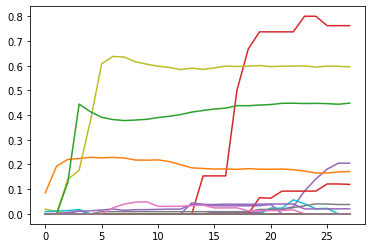

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.89', '0.67', '0.76', '12']
['', '4', '0.18', '0.25', '0.21', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.13', '0.24', '0.17', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.08', '0.02', '0.04', '201']
['', '18', '0.45', '0.87', '0.59', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.40', '0.07', '0.12', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


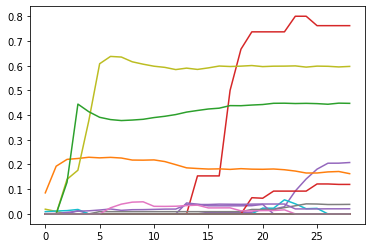

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.89', '0.67', '0.76', '12']
['', '4', '0.17', '0.27', '0.21', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.13', '0.22', '0.16', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.09', '0.02', '0.04', '201']
['', '18', '0.45', '0.87', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.40', '0.07', '0.12', '57']
['', '24', '0.00', '0.0

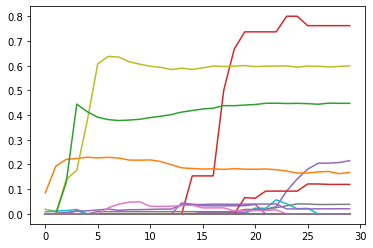

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.89', '0.67', '0.76', '12']
['', '4', '0.17', '0.29', '0.22', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.14', '0.22', '0.17', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.09', '0.02', '0.04', '201']
['', '18', '0.46', '0.86', '0.60', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.40', '0.07', '0.12', '57']
['', '24', '0.00', '0.0

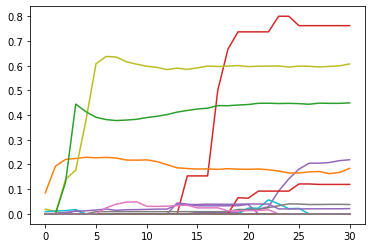

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.89', '0.67', '0.76', '12']
['', '4', '0.17', '0.31', '0.22', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.15', '0.23', '0.18', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.08', '0.02', '0.04', '201']
['', '18', '0.47', '0.87', '0.61', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.40', '0.07', '0.12', '57']
['', '24', '0.00', '0.0

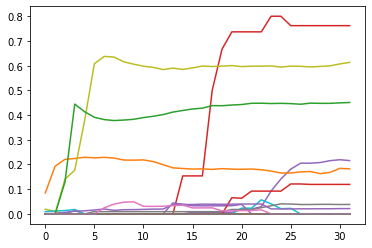

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.89', '0.67', '0.76', '12']
['', '4', '0.16', '0.32', '0.22', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.15', '0.23', '0.18', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.08', '0.02', '0.04', '201']
['', '18', '0.47', '0.87', '0.61', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.40', '0.07', '0.12', '57']
['', '24', '0.00', '0.0

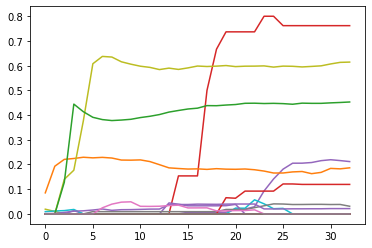

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.89', '0.67', '0.76', '12']
['', '4', '0.16', '0.32', '0.21', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.16', '0.23', '0.19', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.07', '0.02', '0.03', '201']
['', '18', '0.48', '0.86', '0.61', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.40', '0.07', '0.12', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


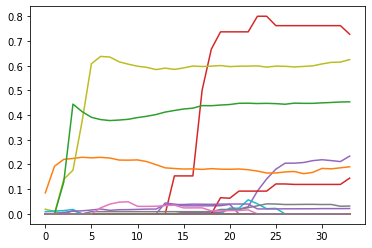

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.80', '0.67', '0.73', '12']
['', '4', '0.17', '0.37', '0.23', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.16', '0.23', '0.19', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.08', '0.02', '0.03', '201']
['', '18', '0.49', '0.87', '0.62', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.42', '0.09', '0.14', '57']
['', '24', '0.00', '0.0

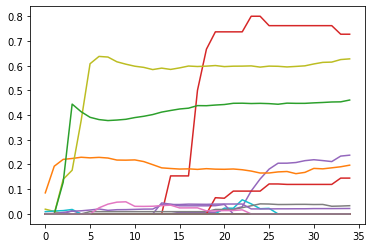

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.80', '0.67', '0.73', '12']
['', '4', '0.17', '0.39', '0.24', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.17', '0.24', '0.20', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.10', '0.02', '0.03', '201']
['', '18', '0.49', '0.86', '0.63', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.42', '0.09', '0.14', '57']
['', '24', '0.00', '0.0

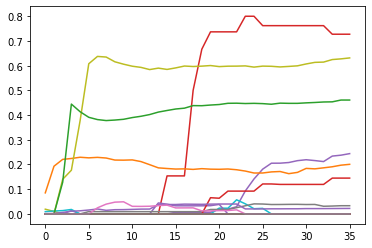

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.80', '0.67', '0.73', '12']
['', '4', '0.17', '0.41', '0.24', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.17', '0.24', '0.20', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.10', '0.02', '0.03', '201']
['', '18', '0.50', '0.86', '0.63', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.42', '0.09', '0.14', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


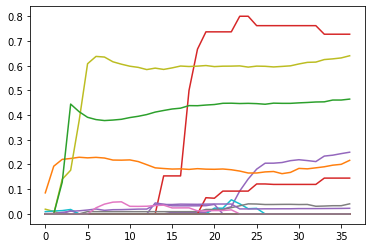

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.80', '0.67', '0.73', '12']
['', '4', '0.18', '0.43', '0.25', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.19', '0.26', '0.22', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.11', '0.02', '0.04', '201']
['', '18', '0.51', '0.85', '0.64', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.42', '0.09', '0.14', '57']
['', '24', '0.00', '0.0

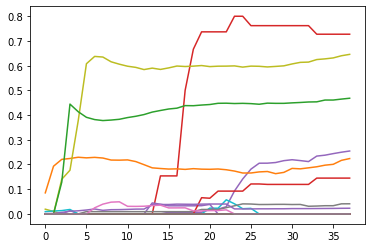

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.80', '0.67', '0.73', '12']
['', '4', '0.18', '0.45', '0.25', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.19', '0.26', '0.22', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.12', '0.02', '0.04', '201']
['', '18', '0.52', '0.85', '0.65', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.42', '0.09', '0.14', '57']
['', '24', '0.00', '0.0

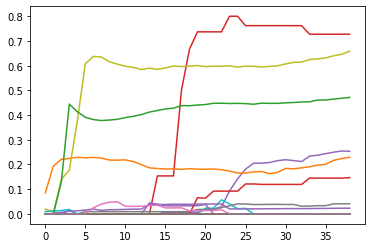

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.80', '0.67', '0.73', '12']
['', '4', '0.18', '0.46', '0.25', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.20', '0.27', '0.23', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.12', '0.02', '0.04', '201']
['', '18', '0.54', '0.85', '0.66', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.45', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


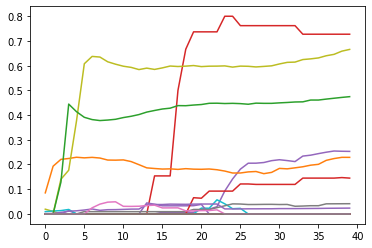

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.80', '0.67', '0.73', '12']
['', '4', '0.17', '0.46', '0.25', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.20', '0.27', '0.23', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.12', '0.02', '0.04', '201']
['', '18', '0.55', '0.85', '0.67', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.42', '0.09', '0.14', '57']
['', '24', '0.00', '0.0

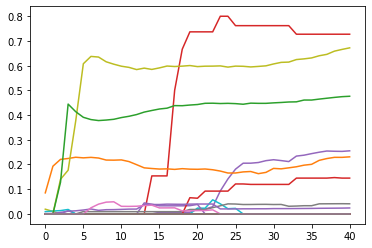

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.80', '0.67', '0.73', '12']
['', '4', '0.18', '0.47', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.20', '0.27', '0.23', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.12', '0.02', '0.04', '201']
['', '18', '0.56', '0.85', '0.67', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.42', '0.09', '0.14', '57']
['', '24', '0.00', '0.0

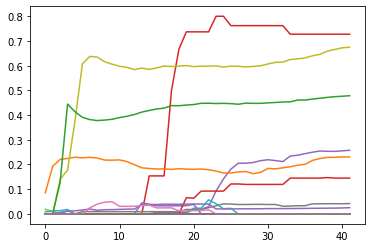

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.80', '0.67', '0.73', '12']
['', '4', '0.18', '0.48', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.20', '0.27', '0.23', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.14', '0.02', '0.04', '201']
['', '18', '0.56', '0.85', '0.67', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.42', '0.09', '0.14', '57']
['', '24', '0.00', '0.0

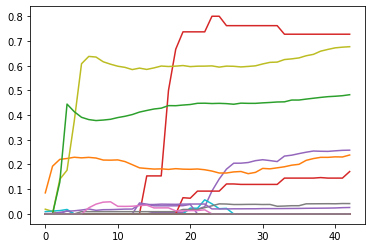

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.80', '0.67', '0.73', '12']
['', '4', '0.18', '0.48', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.20', '0.29', '0.24', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.13', '0.02', '0.04', '201']
['', '18', '0.56', '0.85', '0.68', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.46', '0.11', '0.17', '57']
['', '24', '0.00', '0.0

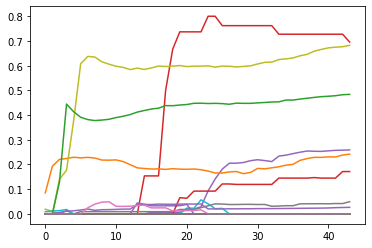

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.73', '0.67', '0.70', '12']
['', '4', '0.18', '0.48', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.29', '0.24', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.15', '0.03', '0.05', '201']
['', '18', '0.57', '0.85', '0.68', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.46', '0.11', '0.17', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


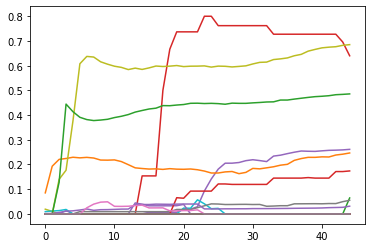

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.04', '0.06', '56']
['', '3', '0.62', '0.67', '0.64', '12']
['', '4', '0.18', '0.48', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.30', '0.25', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.13', '0.03', '0.06', '201']
['', '18', '0.57', '0.85', '0.69', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.11', '0.17', '57']
['', '24', '0.00', '0.0

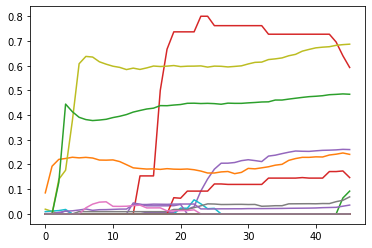

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.05', '0.09', '56']
['', '3', '0.53', '0.67', '0.59', '12']
['', '4', '0.18', '0.48', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.20', '0.29', '0.24', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.15', '0.04', '0.07', '201']
['', '18', '0.58', '0.85', '0.69', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.45', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

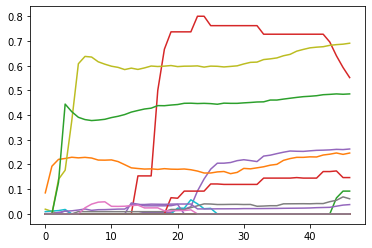

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.05', '0.09', '56']
['', '3', '0.47', '0.67', '0.55', '12']
['', '4', '0.18', '0.48', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.30', '0.25', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.13', '0.04', '0.06', '201']
['', '18', '0.58', '0.85', '0.69', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.45', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


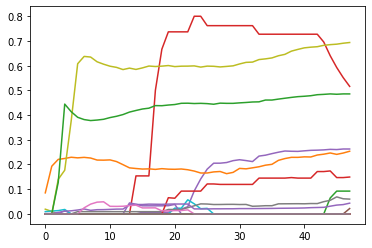

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.05', '0.09', '56']
['', '3', '0.42', '0.67', '0.52', '12']
['', '4', '0.18', '0.48', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.31', '0.25', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.12', '0.04', '0.06', '201']
['', '18', '0.59', '0.85', '0.69', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

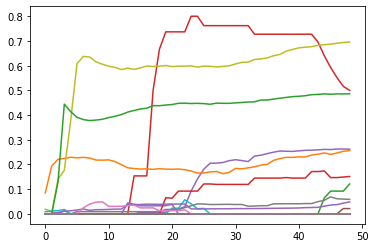

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.40', '0.07', '0.12', '56']
['', '3', '0.40', '0.67', '0.50', '12']
['', '4', '0.18', '0.48', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.22', '0.32', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.11', '0.04', '0.06', '201']
['', '18', '0.59', '0.85', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.56', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

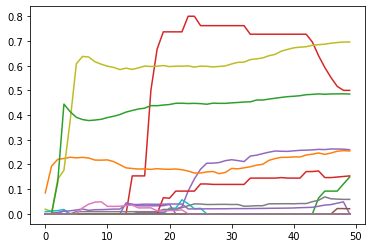

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.45', '0.09', '0.15', '56']
['', '3', '0.40', '0.67', '0.50', '12']
['', '4', '0.18', '0.48', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.32', '0.25', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.11', '0.04', '0.06', '201']
['', '18', '0.59', '0.85', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


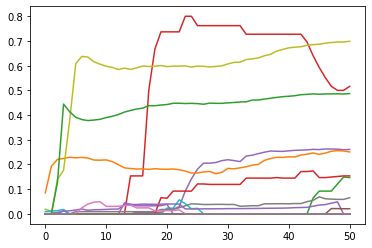

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.42', '0.09', '0.15', '56']
['', '3', '0.42', '0.67', '0.52', '12']
['', '4', '0.18', '0.48', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.31', '0.25', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.12', '0.04', '0.07', '201']
['', '18', '0.59', '0.85', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

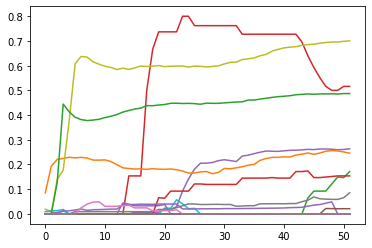

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.43', '0.11', '0.17', '56']
['', '3', '0.42', '0.67', '0.52', '12']
['', '4', '0.18', '0.49', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.30', '0.25', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.15', '0.06', '0.09', '201']
['', '18', '0.59', '0.85', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

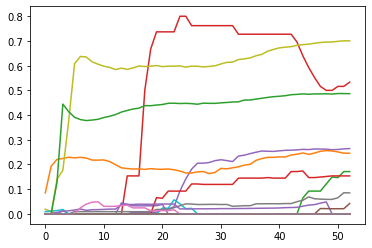

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.43', '0.11', '0.17', '56']
['', '3', '0.44', '0.67', '0.53', '12']
['', '4', '0.18', '0.49', '0.26', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.30', '0.25', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.15', '0.06', '0.09', '201']
['', '18', '0.59', '0.85', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

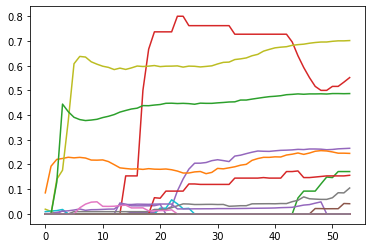

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.00', '0.00', '0.00', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.43', '0.11', '0.17', '56']
['', '3', '0.47', '0.67', '0.55', '12']
['', '4', '0.18', '0.49', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.30', '0.24', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.18', '0.07', '0.10', '201']
['', '18', '0.60', '0.85', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

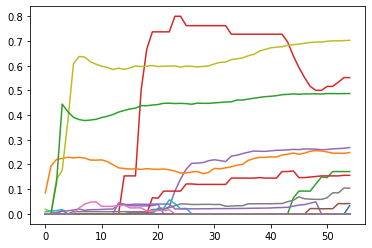

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.50', '0.02', '0.03', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.43', '0.11', '0.17', '56']
['', '3', '0.47', '0.67', '0.55', '12']
['', '4', '0.18', '0.50', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.30', '0.25', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.17', '0.07', '0.10', '201']
['', '18', '0.60', '0.85', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


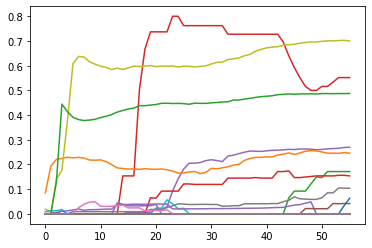

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.40', '0.03', '0.06', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.43', '0.11', '0.17', '56']
['', '3', '0.47', '0.67', '0.55', '12']
['', '4', '0.18', '0.51', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.30', '0.25', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.17', '0.07', '0.10', '201']
['', '18', '0.60', '0.85', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

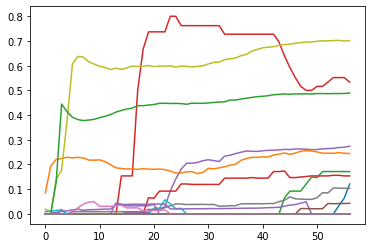

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.50', '0.07', '0.12', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.43', '0.11', '0.17', '56']
['', '3', '0.44', '0.67', '0.53', '12']
['', '4', '0.19', '0.52', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.30', '0.24', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.17', '0.07', '0.10', '201']
['', '18', '0.60', '0.85', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

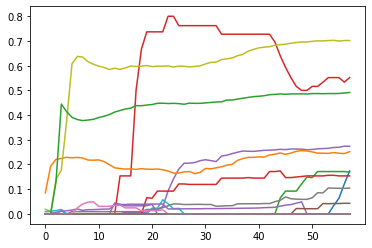

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.55', '0.10', '0.17', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.40', '0.11', '0.17', '56']
['', '3', '0.47', '0.67', '0.55', '12']
['', '4', '0.19', '0.52', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.21', '0.31', '0.25', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.17', '0.07', '0.10', '201']
['', '18', '0.60', '0.85', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


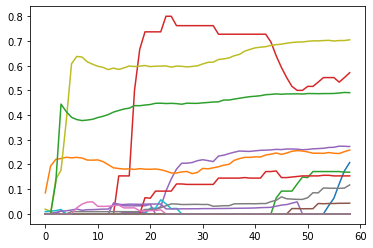

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.42', '0.14', '0.21', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.40', '0.11', '0.17', '56']
['', '3', '0.50', '0.67', '0.57', '12']
['', '4', '0.18', '0.52', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.22', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.19', '0.08', '0.12', '201']
['', '18', '0.60', '0.85', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

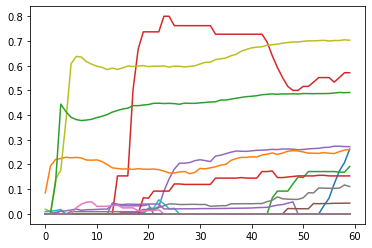

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.42', '0.19', '0.26', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.41', '0.12', '0.19', '56']
['', '3', '0.50', '0.67', '0.57', '12']
['', '4', '0.18', '0.52', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.22', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.18', '0.08', '0.11', '201']
['', '18', '0.60', '0.84', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

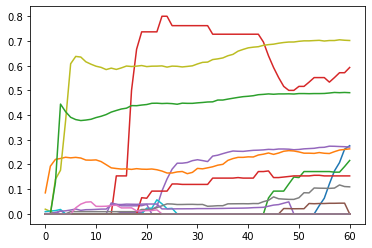

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.41', '0.21', '0.28', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.44', '0.14', '0.22', '56']
['', '3', '0.53', '0.67', '0.59', '12']
['', '4', '0.18', '0.52', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.23', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.18', '0.08', '0.11', '201']
['', '18', '0.60', '0.84', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


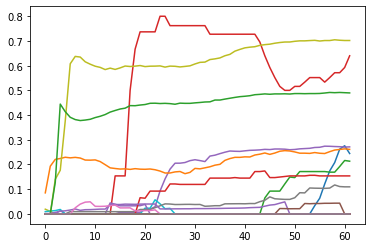

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.34', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.42', '0.14', '0.21', '56']
['', '3', '0.62', '0.67', '0.64', '12']
['', '4', '0.18', '0.52', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.23', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.18', '0.08', '0.11', '201']
['', '18', '0.60', '0.84', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

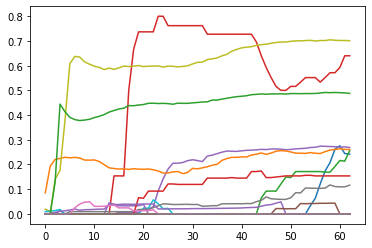

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.45', '0.18', '0.26', '56']
['', '3', '0.62', '0.67', '0.64', '12']
['', '4', '0.18', '0.51', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.22', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.19', '0.08', '0.12', '201']
['', '18', '0.60', '0.84', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

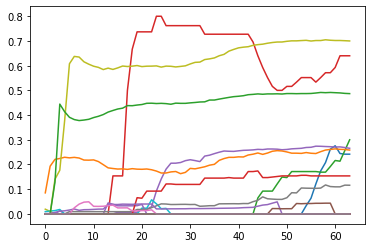

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.50', '0.21', '0.30', '56']
['', '3', '0.62', '0.67', '0.64', '12']
['', '4', '0.18', '0.51', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.22', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.18', '0.08', '0.12', '201']
['', '18', '0.60', '0.84', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

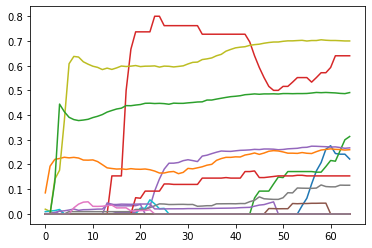

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.17', '0.22', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.48', '0.23', '0.31', '56']
['', '3', '0.62', '0.67', '0.64', '12']
['', '4', '0.18', '0.51', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.22', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.18', '0.08', '0.12', '201']
['', '18', '0.60', '0.84', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

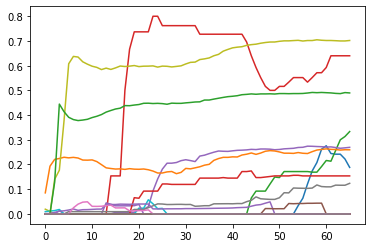

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.30', '0.14', '0.19', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.44', '0.27', '0.33', '56']
['', '3', '0.62', '0.67', '0.64', '12']
['', '4', '0.18', '0.51', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.22', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.09', '0.12', '201']
['', '18', '0.60', '0.84', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


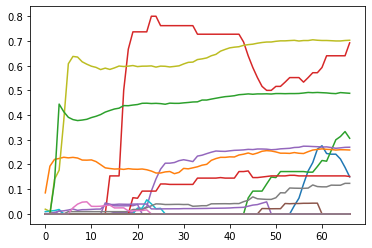

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.27', '0.10', '0.15', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.36', '0.27', '0.31', '56']
['', '3', '0.64', '0.75', '0.69', '12']
['', '4', '0.18', '0.51', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.22', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.09', '0.12', '201']
['', '18', '0.60', '0.84', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.56', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

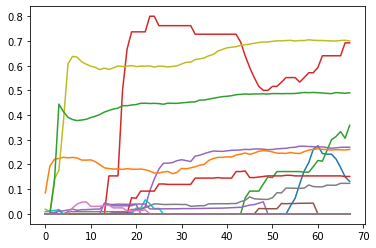

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.28', '0.09', '0.13', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.38', '0.34', '0.36', '56']
['', '3', '0.64', '0.75', '0.69', '12']
['', '4', '0.18', '0.51', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.23', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.09', '0.12', '201']
['', '18', '0.60', '0.84', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.56', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

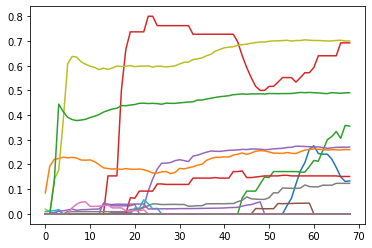

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.29', '0.09', '0.13', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.37', '0.34', '0.36', '56']
['', '3', '0.64', '0.75', '0.69', '12']
['', '4', '0.18', '0.51', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.22', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.09', '0.12', '201']
['', '18', '0.60', '0.84', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.56', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


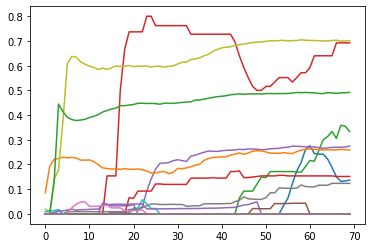

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.09', '0.14', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.34', '0.33', '56']
['', '3', '0.64', '0.75', '0.69', '12']
['', '4', '0.19', '0.52', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.22', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.09', '0.12', '201']
['', '18', '0.60', '0.84', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.56', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

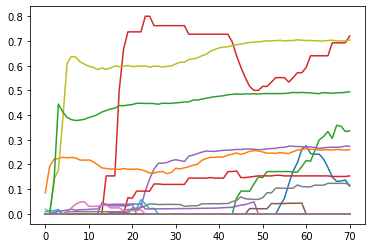

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.07', '0.11', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.32', '0.36', '0.34', '56']
['', '3', '0.69', '0.75', '0.72', '12']
['', '4', '0.19', '0.52', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.22', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.19', '0.08', '0.12', '201']
['', '18', '0.61', '0.84', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

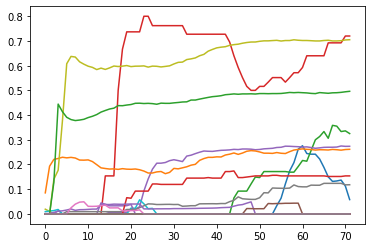

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.18', '0.03', '0.06', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.36', '0.33', '56']
['', '3', '0.69', '0.75', '0.72', '12']
['', '4', '0.19', '0.52', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.22', '0.31', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.08', '0.12', '201']
['', '18', '0.61', '0.84', '0.71', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


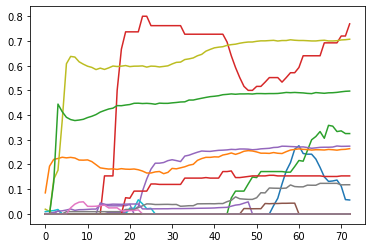

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.15', '0.03', '0.06', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.36', '0.33', '56']
['', '3', '0.71', '0.83', '0.77', '12']
['', '4', '0.19', '0.52', '0.27', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.23', '0.32', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.08', '0.12', '201']
['', '18', '0.61', '0.84', '0.71', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

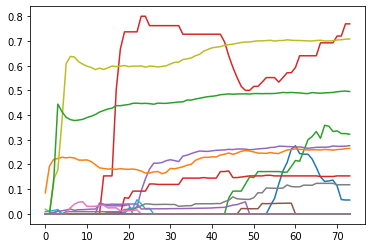

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.15', '0.03', '0.06', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.36', '0.32', '56']
['', '3', '0.71', '0.83', '0.77', '12']
['', '4', '0.19', '0.52', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.23', '0.32', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.08', '0.12', '201']
['', '18', '0.61', '0.84', '0.71', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

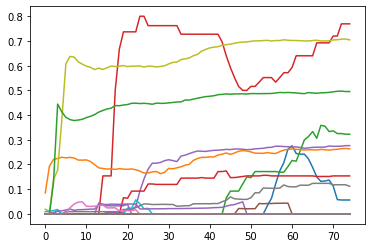

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.15', '0.03', '0.06', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.36', '0.32', '56']
['', '3', '0.71', '0.83', '0.77', '12']
['', '4', '0.19', '0.52', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.23', '0.32', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.19', '0.08', '0.11', '201']
['', '18', '0.61', '0.83', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

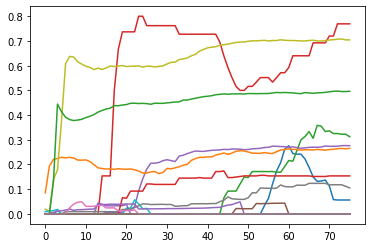

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.15', '0.03', '0.06', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.36', '0.31', '56']
['', '3', '0.71', '0.83', '0.77', '12']
['', '4', '0.19', '0.52', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.23', '0.32', '0.27', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.18', '0.07', '0.11', '201']
['', '18', '0.61', '0.83', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

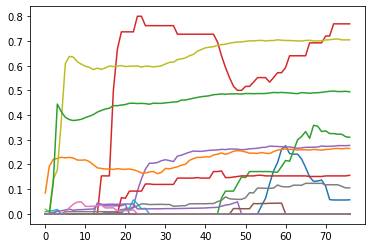

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.17', '0.03', '0.06', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.36', '0.31', '56']
['', '3', '0.71', '0.83', '0.77', '12']
['', '4', '0.19', '0.52', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.23', '0.32', '0.26', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.18', '0.07', '0.11', '201']
['', '18', '0.61', '0.83', '0.70', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


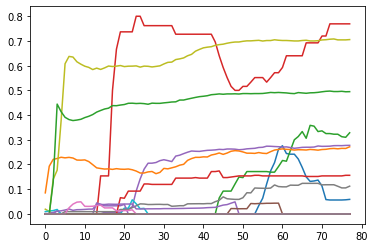

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.20', '0.03', '0.06', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.39', '0.33', '56']
['', '3', '0.71', '0.83', '0.77', '12']
['', '4', '0.19', '0.52', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.23', '0.32', '0.27', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.19', '0.08', '0.11', '201']
['', '18', '0.61', '0.83', '0.71', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

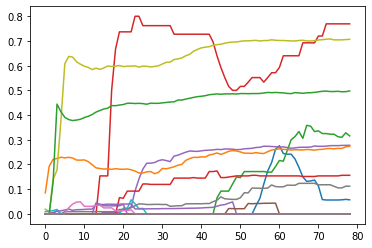

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.17', '0.03', '0.06', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.38', '0.32', '56']
['', '3', '0.71', '0.83', '0.77', '12']
['', '4', '0.19', '0.52', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.24', '0.33', '0.27', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.19', '0.08', '0.11', '201']
['', '18', '0.62', '0.83', '0.71', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

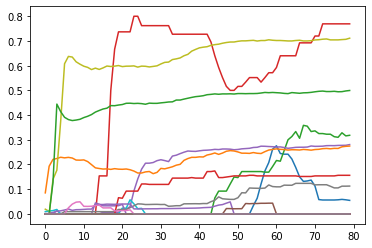

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.13', '0.03', '0.05', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.38', '0.32', '56']
['', '3', '0.71', '0.83', '0.77', '12']
['', '4', '0.19', '0.53', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.24', '0.33', '0.27', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.19', '0.08', '0.11', '201']
['', '18', '0.62', '0.84', '0.71', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


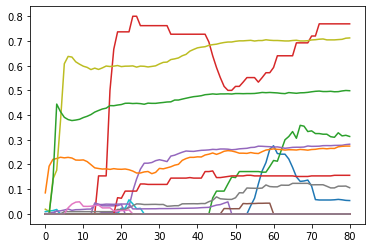

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.12', '0.03', '0.05', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.38', '0.31', '56']
['', '3', '0.71', '0.83', '0.77', '12']
['', '4', '0.19', '0.53', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.24', '0.33', '0.27', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.18', '0.07', '0.11', '201']
['', '18', '0.62', '0.84', '0.71', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

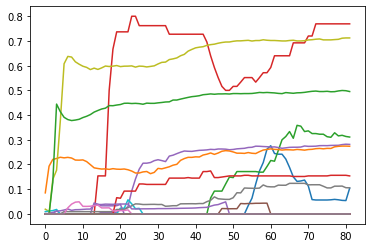

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.21', '0.07', '0.10', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.38', '0.31', '56']
['', '3', '0.71', '0.83', '0.77', '12']
['', '4', '0.19', '0.53', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.24', '0.32', '0.27', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.18', '0.07', '0.11', '201']
['', '18', '0.62', '0.84', '0.71', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

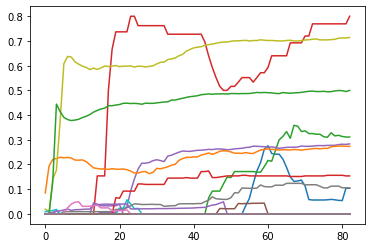

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.21', '0.07', '0.10', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.38', '0.31', '56']
['', '3', '0.77', '0.83', '0.80', '12']
['', '4', '0.19', '0.53', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.24', '0.32', '0.27', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.18', '0.07', '0.11', '201']
['', '18', '0.62', '0.84', '0.71', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


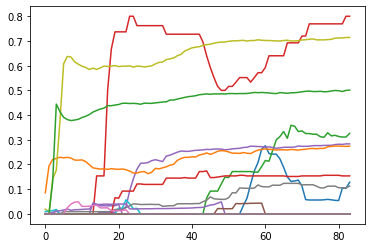

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.25', '0.09', '0.13', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.39', '0.33', '56']
['', '3', '0.77', '0.83', '0.80', '12']
['', '4', '0.19', '0.53', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.24', '0.32', '0.27', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.19', '0.08', '0.11', '201']
['', '18', '0.62', '0.84', '0.71', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

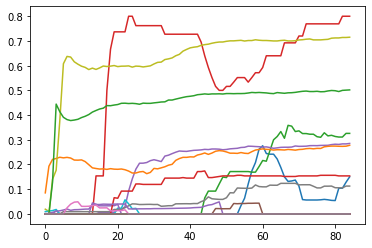

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.27', '0.10', '0.15', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.39', '0.33', '56']
['', '3', '0.77', '0.83', '0.80', '12']
['', '4', '0.20', '0.53', '0.29', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.24', '0.33', '0.28', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.19', '0.08', '0.11', '201']
['', '18', '0.62', '0.84', '0.72', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

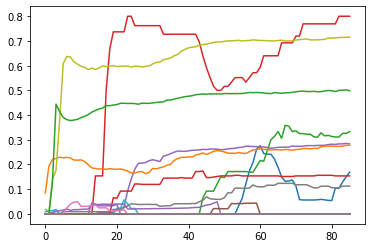

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.28', '0.12', '0.17', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.39', '0.33', '56']
['', '3', '0.77', '0.83', '0.80', '12']
['', '4', '0.19', '0.53', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.24', '0.33', '0.28', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.19', '0.08', '0.11', '201']
['', '18', '0.62', '0.84', '0.72', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

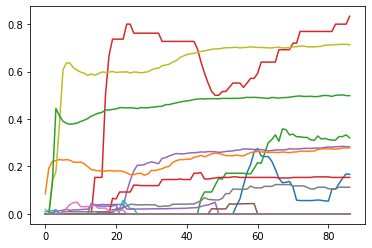

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.27', '0.12', '0.17', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.38', '0.32', '56']
['', '3', '0.83', '0.83', '0.83', '12']
['', '4', '0.19', '0.53', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.24', '0.33', '0.28', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.19', '0.08', '0.11', '201']
['', '18', '0.62', '0.84', '0.71', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

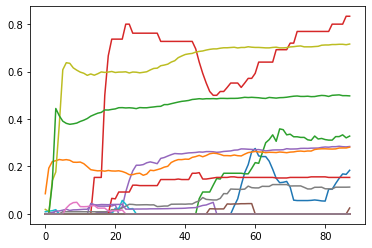

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.28', '0.14', '0.18', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.38', '0.33', '56']
['', '3', '0.83', '0.83', '0.83', '12']
['', '4', '0.19', '0.53', '0.28', '294']
['', '5', '0.05', '0.02', '0.03', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.24', '0.34', '0.28', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.08', '0.11', '201']
['', '18', '0.62', '0.84', '0.72', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.09', '0.15', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


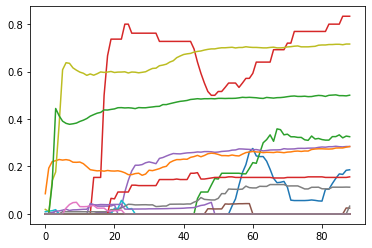

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.29', '0.14', '0.19', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.38', '0.33', '56']
['', '3', '0.83', '0.83', '0.83', '12']
['', '4', '0.19', '0.53', '0.28', '294']
['', '5', '0.04', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.25', '0.34', '0.28', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.19', '0.08', '0.11', '201']
['', '18', '0.62', '0.84', '0.72', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

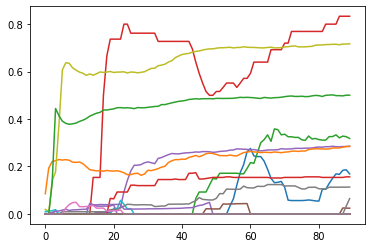

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.28', '0.12', '0.17', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.38', '0.32', '56']
['', '3', '0.83', '0.83', '0.83', '12']
['', '4', '0.20', '0.53', '0.29', '294']
['', '5', '0.04', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.25', '0.34', '0.28', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.08', '0.11', '201']
['', '18', '0.62', '0.84', '0.72', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

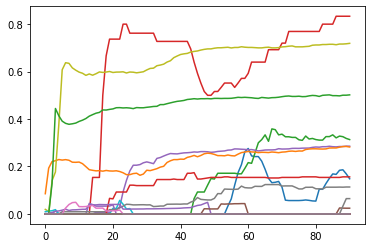

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.26', '0.10', '0.15', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.38', '0.31', '56']
['', '3', '0.83', '0.83', '0.83', '12']
['', '4', '0.20', '0.53', '0.29', '294']
['', '5', '0.04', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.24', '0.33', '0.28', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.08', '0.11', '201']
['', '18', '0.63', '0.85', '0.72', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


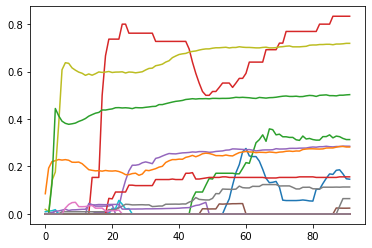

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.25', '0.10', '0.15', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.38', '0.31', '56']
['', '3', '0.83', '0.83', '0.83', '12']
['', '4', '0.20', '0.53', '0.29', '294']
['', '5', '0.04', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.25', '0.33', '0.28', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.08', '0.11', '201']
['', '18', '0.63', '0.85', '0.72', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

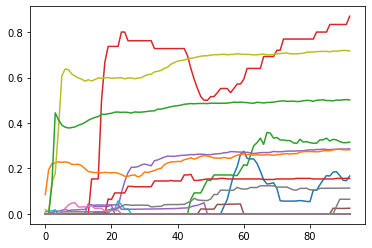

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.27', '0.12', '0.17', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.38', '0.32', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.53', '0.29', '294']
['', '5', '0.05', '0.02', '0.03', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.25', '0.33', '0.28', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.20', '0.08', '0.11', '201']
['', '18', '0.62', '0.85', '0.72', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

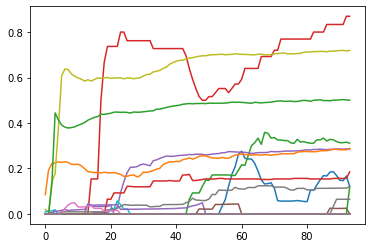

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.21', '0.09', '0.12', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.38', '0.31', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.53', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.25', '0.34', '0.29', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.21', '0.08', '0.12', '201']
['', '18', '0.63', '0.85', '0.72', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.75', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


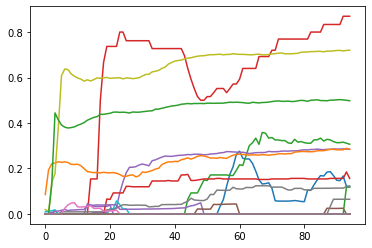

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.21', '0.09', '0.12', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.26', '0.38', '0.31', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.19', '0.52', '0.28', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.25', '0.33', '0.28', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.21', '0.08', '0.12', '201']
['', '18', '0.63', '0.85', '0.72', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

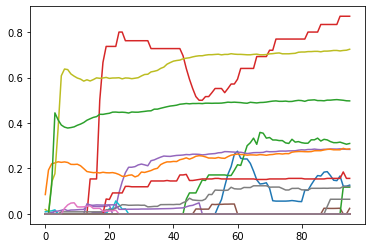

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.24', '0.09', '0.13', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.26', '0.39', '0.31', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.19', '0.52', '0.28', '294']
['', '5', '0.04', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.25', '0.33', '0.29', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.21', '0.08', '0.12', '201']
['', '18', '0.63', '0.85', '0.72', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

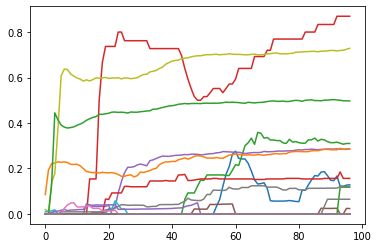

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.25', '0.09', '0.13', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.26', '0.39', '0.31', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.53', '0.29', '294']
['', '5', '0.04', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.25', '0.33', '0.29', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.21', '0.08', '0.12', '201']
['', '18', '0.64', '0.85', '0.73', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


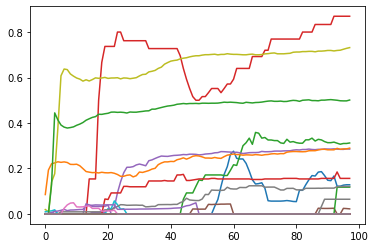

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.25', '0.09', '0.13', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.26', '0.39', '0.31', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.53', '0.29', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.25', '0.34', '0.29', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.21', '0.08', '0.12', '201']
['', '18', '0.64', '0.85', '0.73', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

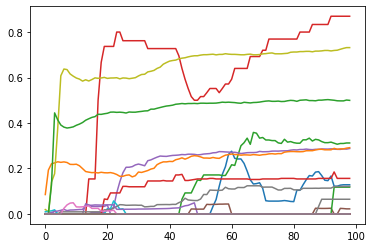

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.25', '0.09', '0.13', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.26', '0.39', '0.31', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.53', '0.29', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.25', '0.34', '0.29', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.22', '0.08', '0.12', '201']
['', '18', '0.64', '0.85', '0.73', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

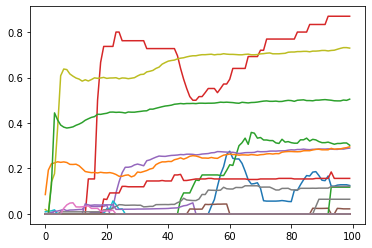

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.23', '0.09', '0.13', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.25', '0.38', '0.30', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.54', '0.29', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.35', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.22', '0.08', '0.12', '201']
['', '18', '0.64', '0.85', '0.73', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


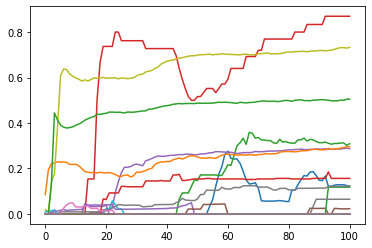

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.21', '0.09', '0.12', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.26', '0.38', '0.31', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.54', '0.29', '294']
['', '5', '0.04', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.35', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.22', '0.08', '0.12', '201']
['', '18', '0.64', '0.85', '0.73', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

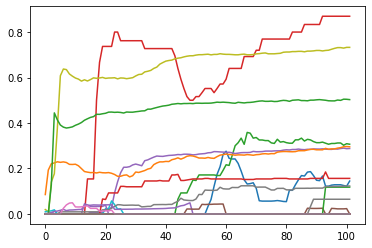

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.24', '0.10', '0.14', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.26', '0.38', '0.31', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.54', '0.29', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.35', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.22', '0.08', '0.12', '201']
['', '18', '0.64', '0.85', '0.73', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

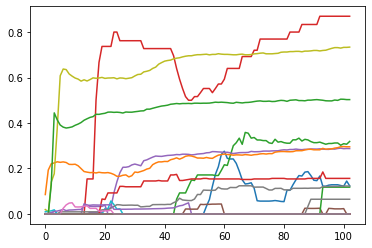

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.22', '0.09', '0.12', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.39', '0.32', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.54', '0.29', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.35', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.22', '0.08', '0.12', '201']
['', '18', '0.65', '0.85', '0.73', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


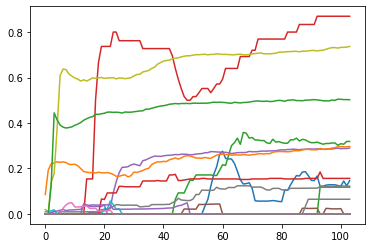

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.25', '0.10', '0.15', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.39', '0.32', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.55', '0.29', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.35', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.22', '0.08', '0.12', '201']
['', '18', '0.65', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

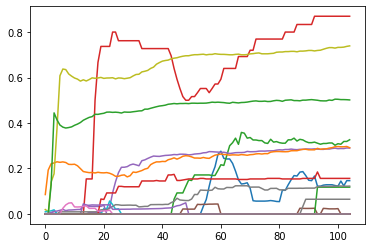

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.25', '0.10', '0.15', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.41', '0.33', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.54', '0.29', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.25', '0.35', '0.29', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.22', '0.08', '0.12', '201']
['', '18', '0.65', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

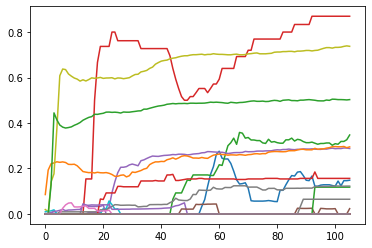

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.26', '0.10', '0.15', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.54', '0.29', '294']
['', '5', '0.04', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.25', '0.35', '0.29', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.22', '0.08', '0.12', '201']
['', '18', '0.65', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


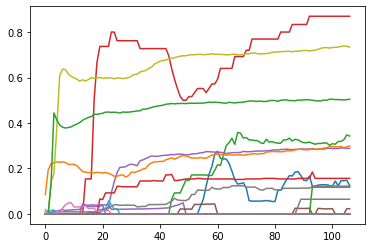

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.23', '0.09', '0.13', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.45', '0.34', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.54', '0.29', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.22', '0.08', '0.12', '201']
['', '18', '0.65', '0.85', '0.73', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

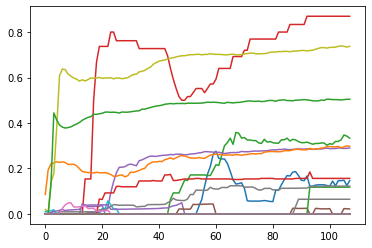

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.25', '0.10', '0.15', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.43', '0.33', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.54', '0.29', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.22', '0.08', '0.12', '201']
['', '18', '0.65', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

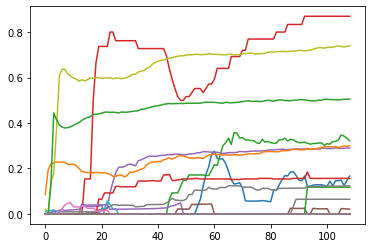

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.27', '0.12', '0.17', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.26', '0.41', '0.32', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.54', '0.29', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.08', '0.12', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


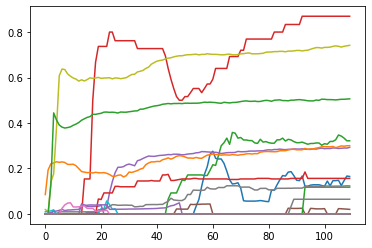

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.26', '0.12', '0.16', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.26', '0.41', '0.32', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.54', '0.29', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.08', '0.12', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

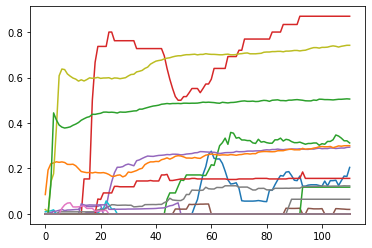

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.30', '0.16', '0.20', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.26', '0.39', '0.31', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.55', '0.29', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.08', '0.12', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.71', '0.09', '0.16', '57']
['', '24', '0.00', '0.0

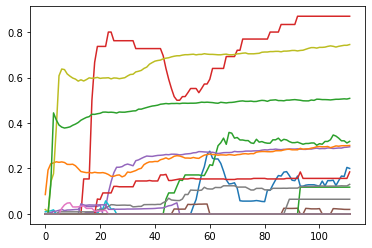

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.28', '0.16', '0.20', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.39', '0.32', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.55', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.13', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.75', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


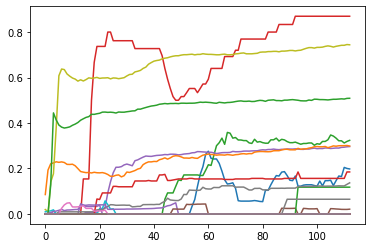

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.27', '0.16', '0.20', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.39', '0.32', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.55', '0.30', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.09', '0.14', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.75', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

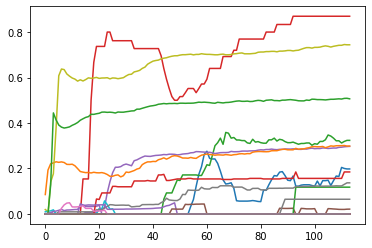

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.27', '0.16', '0.20', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.39', '0.32', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.56', '0.30', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.09', '0.14', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.75', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

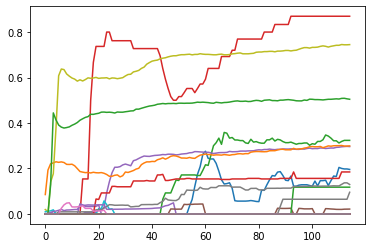

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.26', '0.16', '0.20', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.39', '0.32', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.56', '0.30', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.09', '0.13', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.75', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


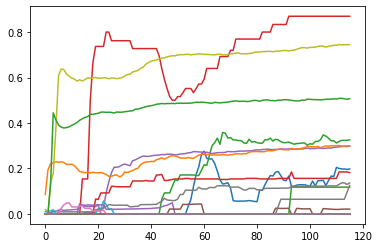

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.27', '0.16', '0.20', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.39', '0.33', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.56', '0.30', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.14', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

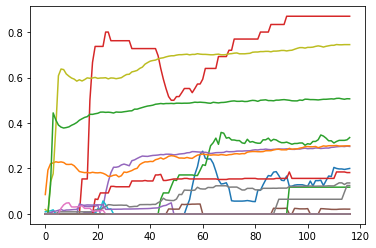

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.28', '0.16', '0.20', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.41', '0.34', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.56', '0.30', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.14', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

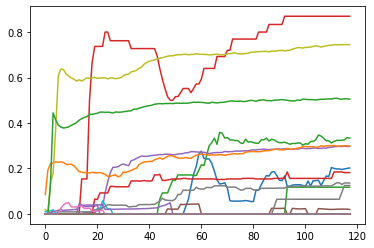

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.29', '0.16', '0.20', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.41', '0.33', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.56', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.14', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


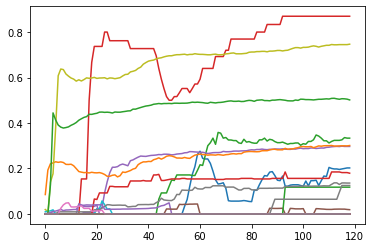

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.29', '0.16', '0.20', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.41', '0.33', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.56', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.14', '201']
['', '18', '0.66', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.60', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

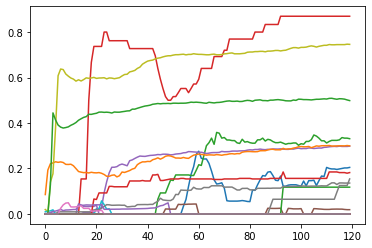

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.30', '0.16', '0.20', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.41', '0.33', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.56', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.36', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.14', '201']
['', '18', '0.66', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

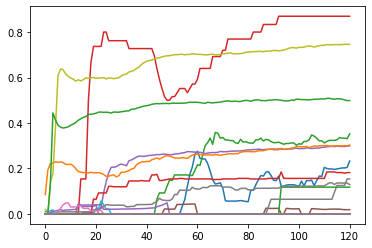

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.36', '0.17', '0.23', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.56', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.37', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.09', '0.13', '201']
['', '18', '0.66', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


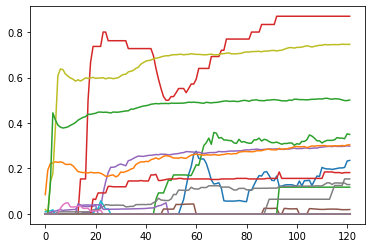

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.37', '0.17', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.56', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.37', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.09', '0.13', '201']
['', '18', '0.66', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

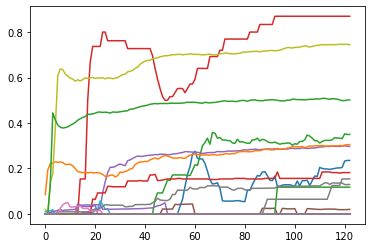

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.37', '0.17', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.56', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.37', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.09', '0.13', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

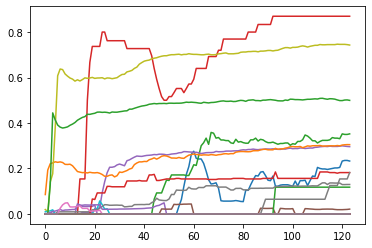

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.36', '0.17', '0.23', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.56', '0.30', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.37', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.09', '0.13', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


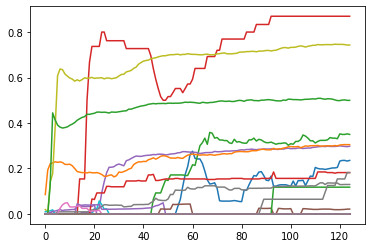

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.37', '0.17', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.56', '0.30', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.37', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.09', '0.13', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

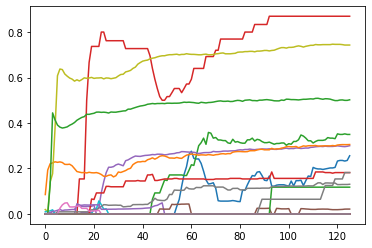

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.39', '0.19', '0.26', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.20', '0.57', '0.30', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.37', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.13', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

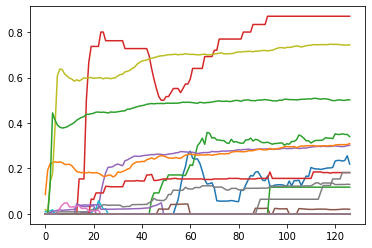

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.38', '0.16', '0.22', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.45', '0.34', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.03', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.13', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


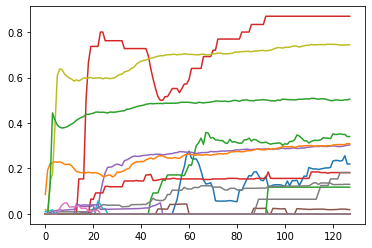

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.38', '0.16', '0.22', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.45', '0.34', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.13', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

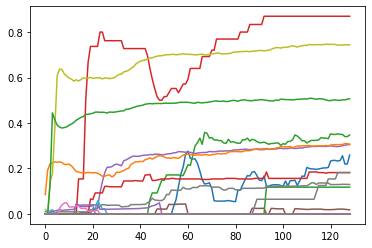

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.41', '0.19', '0.26', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.21', '0.57', '0.31', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.09', '0.13', '201']
['', '18', '0.66', '0.85', '0.74', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

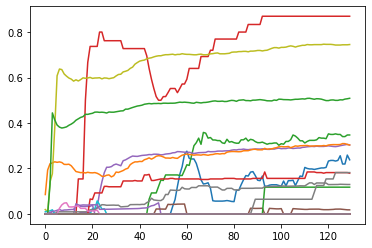

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.38', '0.17', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.37', '0.30', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.09', '0.13', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.60', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


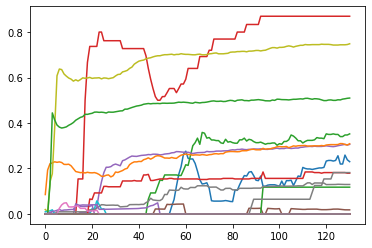

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.34', '0.17', '0.23', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.21', '0.57', '0.31', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.09', '0.13', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.60', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

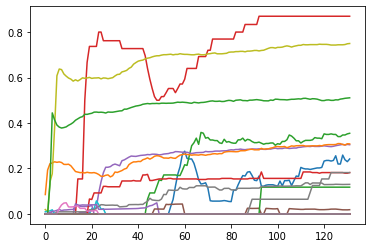

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.21', '0.58', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.13', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

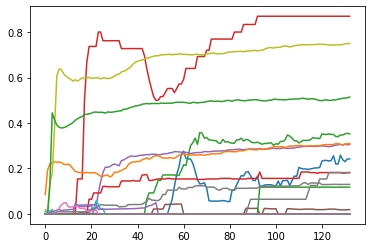

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.21', '0.58', '0.31', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.13', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


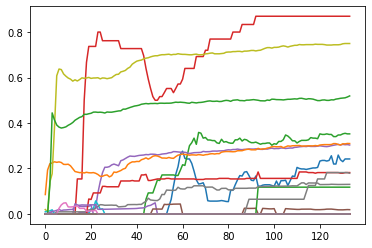

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.45', '0.35', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.21', '0.58', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.13', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

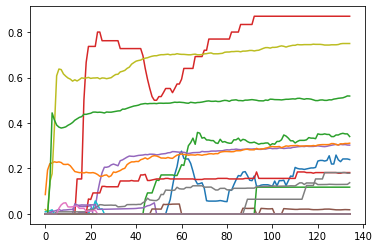

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.32', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.43', '0.34', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.09', '0.14', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.67', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

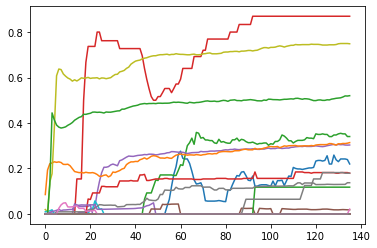

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.30', '0.17', '0.22', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.43', '0.34', '56']
['', '3', '0.91', '0.83', '0.87', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.09', '0.14', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.60', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


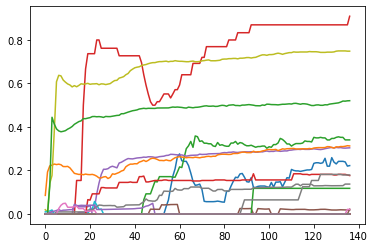

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.17', '0.22', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.43', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.09', '0.14', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.55', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

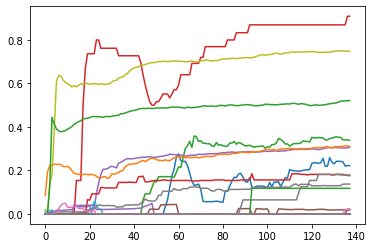

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.17', '0.22', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.43', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.57', '0.31', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.09', '0.14', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.55', '0.11', '0.18', '57']
['', '24', '0.00', '0.0

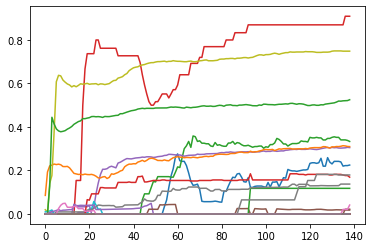

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.32', '0.17', '0.22', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.43', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.57', '0.31', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.09', '0.14', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.43', '0.11', '0.17', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


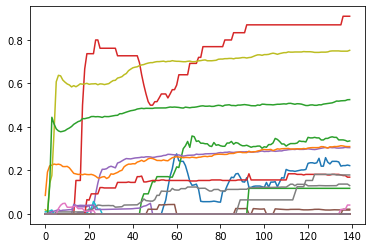

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.17', '0.22', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.43', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.13', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.43', '0.11', '0.17', '57']
['', '24', '0.00', '0.0

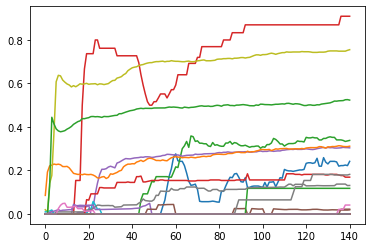

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.43', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.09', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.43', '0.11', '0.17', '57']
['', '24', '0.00', '0.0

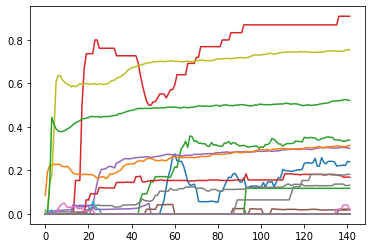

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.32', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.43', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.20', '0.57', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.09', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.43', '0.11', '0.17', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


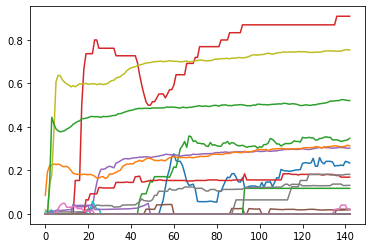

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.19', '0.23', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.43', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.09', '0.13', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.43', '0.11', '0.17', '57']
['', '24', '0.00', '0.0

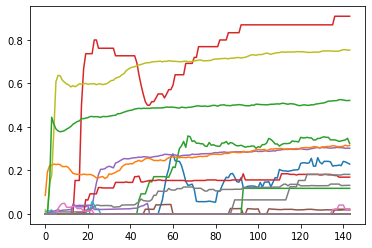

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.29', '0.19', '0.23', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.39', '0.32', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.09', '0.13', '201']
['', '18', '0.67', '0.85', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.43', '0.11', '0.17', '57']
['', '24', '0.00', '0.0

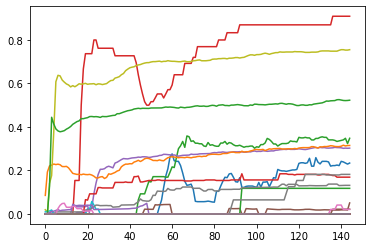

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.19', '0.23', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.43', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.05', '0.05', '0.05', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.09', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.43', '0.11', '0.17', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


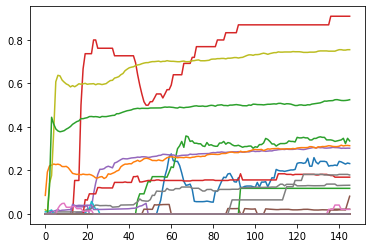

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.30', '0.19', '0.23', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.41', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.08', '0.08', '0.08', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.09', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.43', '0.11', '0.17', '57']
['', '24', '0.00', '0.0

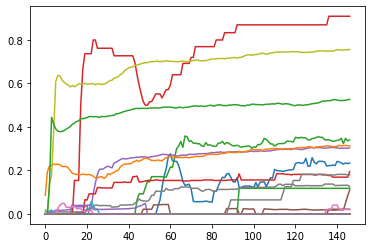

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.19', '0.23', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.41', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.57', '0.30', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.47', '0.12', '0.19', '57']
['', '24', '0.00', '0.0

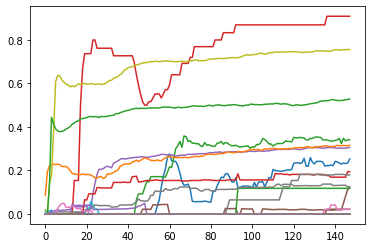

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.32', '0.21', '0.25', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.41', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.58', '0.31', '294']
['', '5', '0.11', '0.14', '0.12', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.13', '201']
['', '18', '0.68', '0.85', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.47', '0.12', '0.19', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


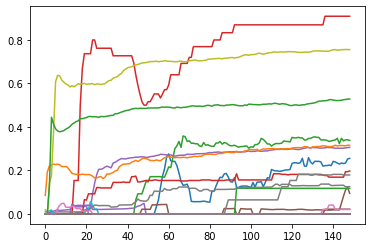

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.21', '0.26', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.41', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.58', '0.31', '294']
['', '5', '0.09', '0.10', '0.09', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.13', '201']
['', '18', '0.68', '0.85', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

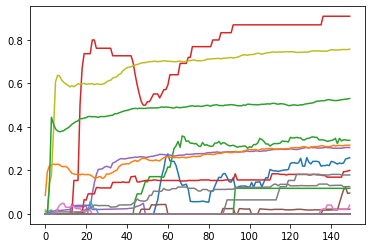

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.34', '0.21', '0.26', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.41', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.58', '0.31', '294']
['', '5', '0.09', '0.10', '0.10', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.54', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

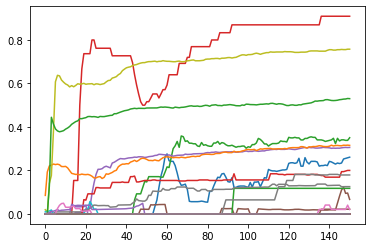

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.35', '0.21', '0.26', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.43', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.58', '0.31', '294']
['', '5', '0.07', '0.07', '0.07', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.54', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


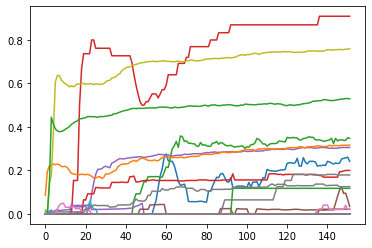

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.43', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.58', '0.31', '294']
['', '5', '0.04', '0.03', '0.03', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.54', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

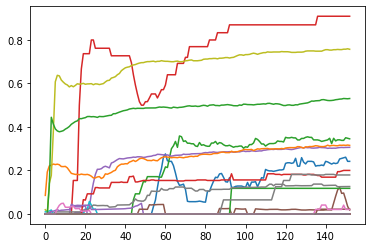

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.43', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.58', '0.31', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.54', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

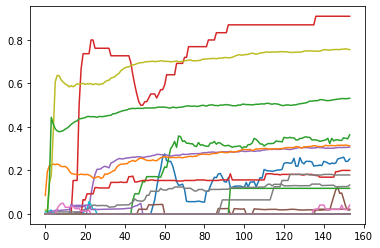

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.38', '0.19', '0.25', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.46', '0.36', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.02', '0.02', '0.02', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.40', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.26', '0.09', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.54', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


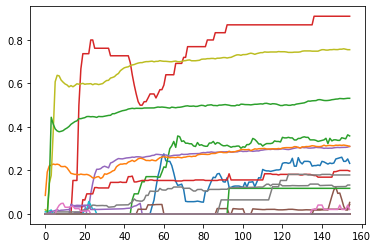

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.36', '0.17', '0.23', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.46', '0.36', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.05', '0.05', '0.05', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.26', '0.09', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

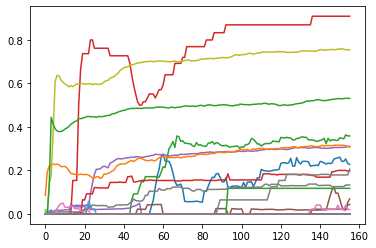

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.17', '0.23', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.46', '0.36', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.07', '0.07', '0.07', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.26', '0.09', '0.13', '201']
['', '18', '0.67', '0.86', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

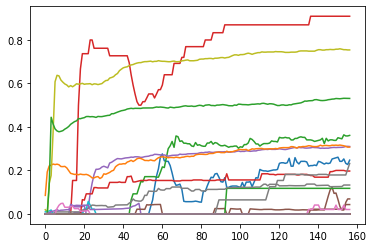

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.35', '0.19', '0.25', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.46', '0.36', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.07', '0.07', '0.07', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.26', '0.09', '0.13', '201']
['', '18', '0.67', '0.86', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


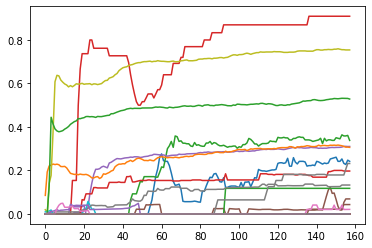

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.43', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.07', '0.07', '0.07', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.26', '0.09', '0.13', '201']
['', '18', '0.67', '0.86', '0.75', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

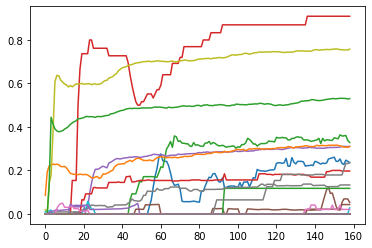

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.19', '0.24', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.27', '0.41', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.05', '0.05', '0.05', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.26', '0.09', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

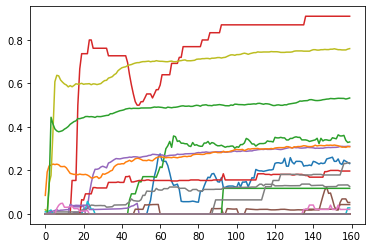

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.30', '0.19', '0.23', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.41', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.05', '0.05', '0.05', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.13', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


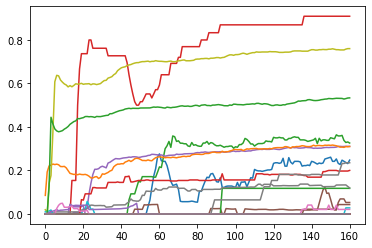

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.21', '0.25', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.28', '0.39', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.05', '0.05', '0.05', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.38', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.54', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

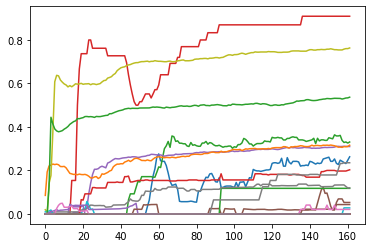

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.32', '0.22', '0.26', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.39', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.05', '0.05', '0.05', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.58', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

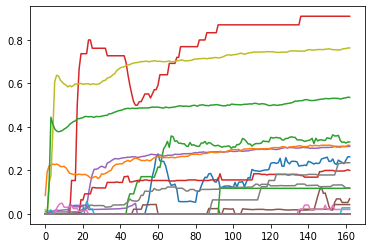

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.32', '0.22', '0.26', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.39', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.07', '0.07', '0.07', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.54', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


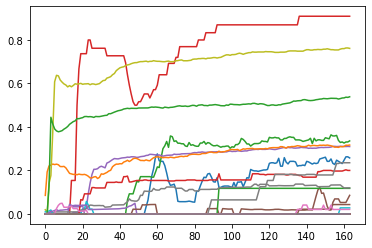

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.30', '0.22', '0.26', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.39', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.09', '0.08', '0.09', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.54', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

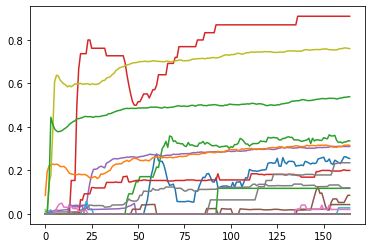

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.30', '0.22', '0.25', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.39', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.09', '0.08', '0.09', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.54', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

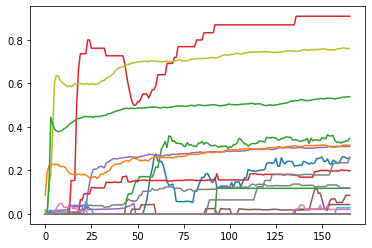

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.30', '0.22', '0.25', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.41', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.09', '0.08', '0.09', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


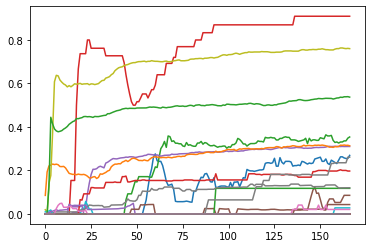

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.30', '0.24', '0.27', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.31', '0.41', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.09', '0.08', '0.09', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

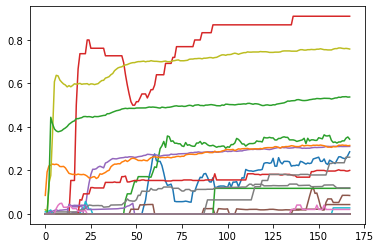

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.32', '0.26', '0.29', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.31', '0.39', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.08', '0.08', '0.08', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.26', '0.39', '0.31', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.54', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

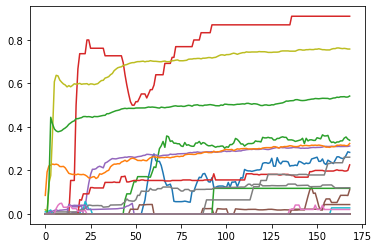

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.26', '0.28', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.31', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.41', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


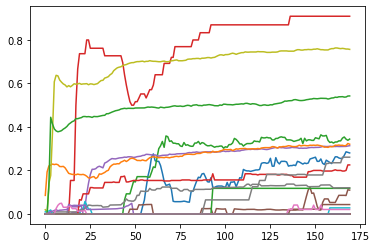

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.26', '0.28', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.32', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.12', '201']
['', '18', '0.67', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

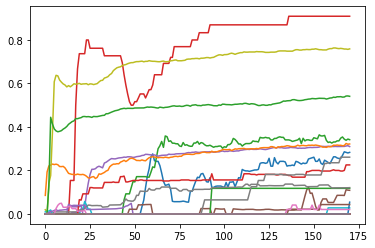

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.26', '0.28', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.31', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.58', '0.31', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.20', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

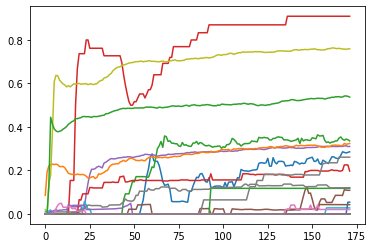

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.32', '0.26', '0.29', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.58', '0.31', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.20', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.12', '0.20', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


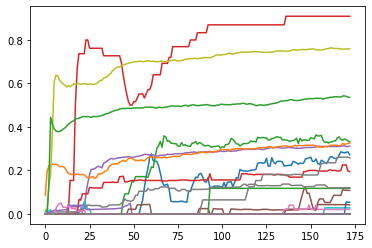

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.31', '0.24', '0.27', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.58', '0.31', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.20', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.47', '0.12', '0.19', '57']
['', '24', '0.00', '0.0

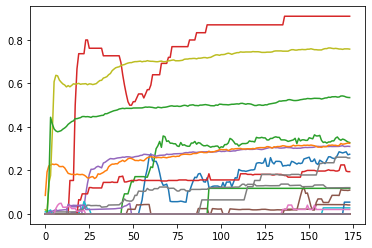

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.32', '0.24', '0.27', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.29', '0.38', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.58', '0.31', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.20', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.47', '0.12', '0.19', '57']
['', '24', '0.00', '0.0

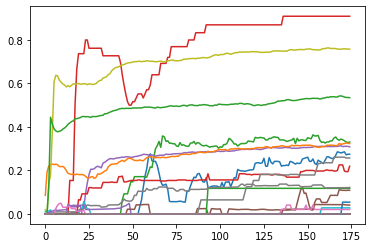

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.32', '0.24', '0.27', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.58', '0.31', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.26', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.20', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


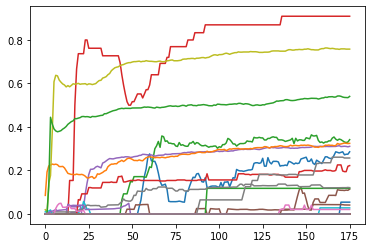

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.32', '0.26', '0.29', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.31', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.11', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.20', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.53', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

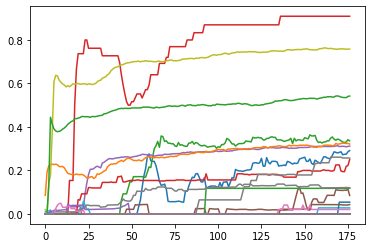

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.26', '0.29', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.60', '0.31', '294']
['', '5', '0.08', '0.08', '0.08', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.12', '201']
['', '18', '0.68', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.20', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.60', '0.16', '0.25', '57']
['', '24', '0.00', '0.0

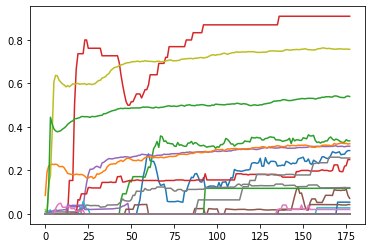

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.26', '0.29', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.60', '0.31', '294']
['', '5', '0.08', '0.07', '0.07', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.12', '201']
['', '18', '0.67', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.20', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.60', '0.16', '0.25', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


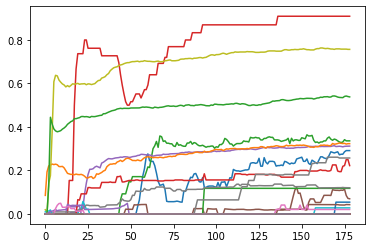

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.33', '0.26', '0.29', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.07', '0.07', '0.07', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.25', '0.08', '0.12', '201']
['', '18', '0.67', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.20', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.53', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

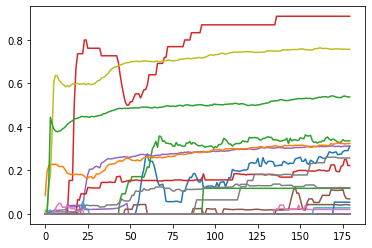

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.36', '0.28', '0.31', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.07', '0.07', '0.07', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.67', '0.86', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.20', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.53', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

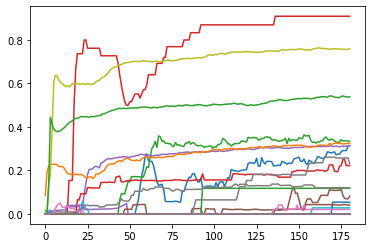

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.36', '0.28', '0.31', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.08', '0.08', '0.08', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.17', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.53', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


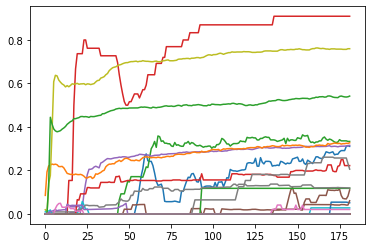

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.36', '0.28', '0.31', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.32', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.41', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.14', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.53', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

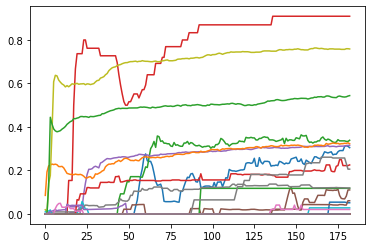

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.34', '0.28', '0.30', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.31', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.32', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.67', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.14', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

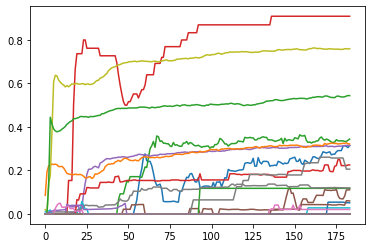

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.34', '0.29', '0.31', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.32', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.14', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


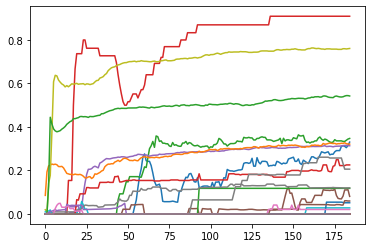

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.35', '0.31', '0.33', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.32', '0.38', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.08', '0.08', '0.08', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.14', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

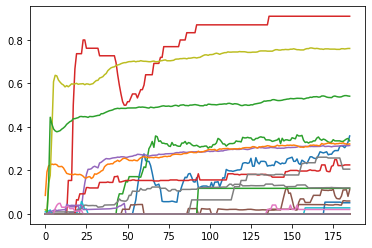

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.40', '0.33', '0.36', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.14', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

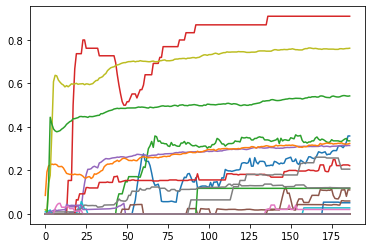

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.40', '0.33', '0.36', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.21', '0.59', '0.31', '294']
['', '5', '0.10', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.14', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.53', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


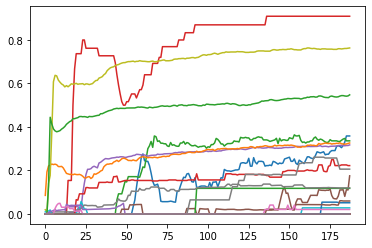

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.40', '0.33', '0.36', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.60', '0.32', '294']
['', '5', '0.15', '0.20', '0.18', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.41', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.08', '0.12', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.14', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.53', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

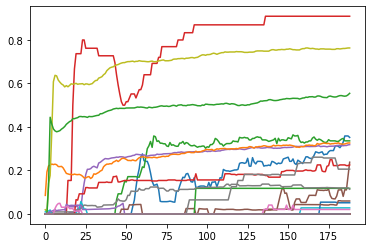

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.38', '0.33', '0.35', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.30', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.60', '0.32', '294']
['', '5', '0.20', '0.29', '0.24', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.41', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.07', '0.11', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.14', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

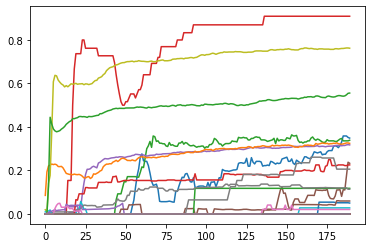

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.37', '0.33', '0.35', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.31', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.60', '0.32', '294']
['', '5', '0.20', '0.29', '0.23', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.27', '0.40', '0.32', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.24', '0.07', '0.11', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.12', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


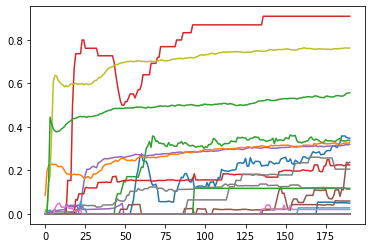

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.37', '0.33', '0.35', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.31', '0.38', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.61', '0.32', '294']
['', '5', '0.20', '0.29', '0.24', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.28', '0.41', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.07', '0.11', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.12', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

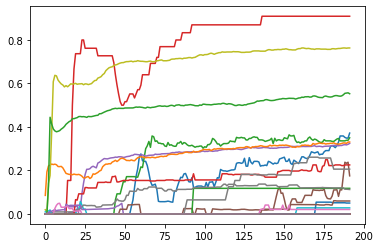

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.38', '0.36', '0.37', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.38', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.62', '0.32', '294']
['', '5', '0.15', '0.20', '0.18', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.28', '0.40', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.23', '0.07', '0.11', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.12', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

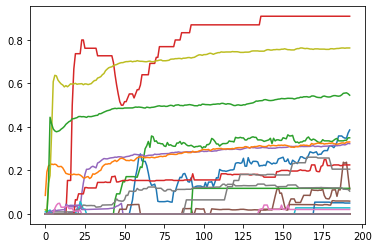

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.39', '0.38', '0.39', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.38', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.62', '0.32', '294']
['', '5', '0.11', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.28', '0.40', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.21', '0.07', '0.10', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.12', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


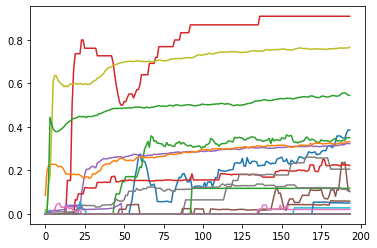

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.39', '0.38', '0.39', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.38', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.62', '0.32', '294']
['', '5', '0.10', '0.10', '0.10', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.28', '0.40', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.21', '0.07', '0.10', '201']
['', '18', '0.68', '0.87', '0.77', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.12', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.53', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

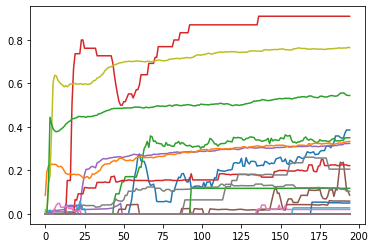

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.39', '0.38', '0.39', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.38', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.62', '0.32', '294']
['', '5', '0.09', '0.08', '0.09', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.29', '0.40', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.21', '0.07', '0.10', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.12', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.53', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

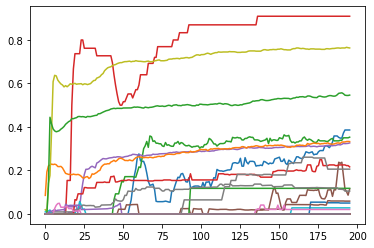

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.39', '0.38', '0.39', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.38', '0.35', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.62', '0.33', '294']
['', '5', '0.11', '0.12', '0.11', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.28', '0.40', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.21', '0.07', '0.10', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.12', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.47', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


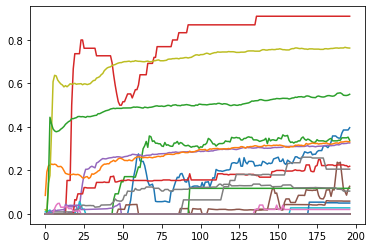

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.40', '0.40', '0.40', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.32', '0.36', '0.34', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.62', '0.33', '294']
['', '5', '0.12', '0.14', '0.13', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.28', '0.40', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.21', '0.07', '0.10', '201']
['', '18', '0.68', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.12', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.50', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

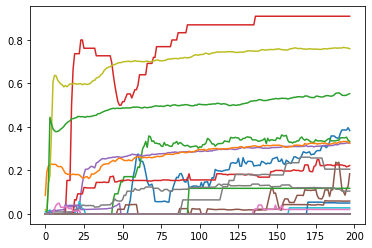

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.37', '0.40', '0.38', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.34', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.62', '0.33', '294']
['', '5', '0.17', '0.20', '0.18', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.28', '0.40', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.21', '0.07', '0.10', '201']
['', '18', '0.67', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.12', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.53', '0.14', '0.22', '57']
['', '24', '0.00', '0.0

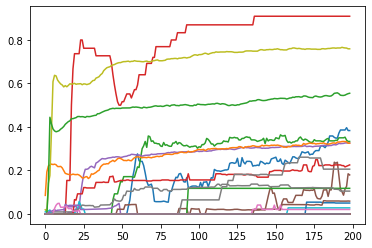

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

['', '0', '0.37', '0.40', '0.38', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.34', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.62', '0.33', '294']
['', '5', '0.16', '0.20', '0.18', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.28', '0.40', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.21', '0.07', '0.10', '201']
['', '18', '0.67', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.12', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.57', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


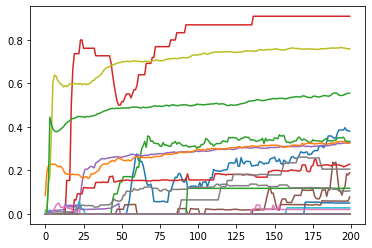

['', '0', '0.37', '0.40', '0.38', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.33', '0.34', '0.33', '56']
['', '3', '1.00', '0.83', '0.91', '12']
['', '4', '0.22', '0.62', '0.33', '294']
['', '5', '0.17', '0.22', '0.19', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '1.00', '0.01', '0.03', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.28', '0.40', '0.33', '364']
['', '12', '1.00', '0.06', '0.12', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.22', '0.07', '0.11', '201']
['', '18', '0.67', '0.87', '0.76', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.12', '0.03', '0.05', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.62', '0.14', '0.23', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: De

In [109]:
########################## Running IDS Model ######################    
maxEpochforIDS=200
model = ANN()
F1_list_before=[]
Pre_list=[]
Report_before=[]

 
optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()



for epoch in range(maxEpochforIDS):
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        correct_cnt+= (pred_label == target).sum().item()
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        loss.backward()
        optimizer.step()
        if (epoch+1) % 20 == 0 or (batch_idx+1) == len(train_loader):
            continue
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, ave_loss, correct_cnt*1.0/total_cnt))
    # testing
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    
    
    for batch_idx, (x, target) in enumerate(testing_loader):
        #print(batch_idx,x.shape, target.shape)
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
#       print(target.data)
        correct_cnt += (pred_label == target).sum().item()
        # smooth average
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
       
        if(epoch+1) % 1 == 0 or (batch_idx+1) == len(testing_loader):
            F1= f1_score(target, pred_label, average=None)
            Pre=precision_score(target, pred_label, average=None)
            #Precission=precision_score(target, pred_label, average='macro')


            #print('==>>> epoch: {}, batch index: {}, test loss: {:.6f},'.format(
                #epoch, batch_idx+1, ave_loss, correct_cnt * 1.0 / total_cnt))
            #print('F1',F1)
            if np.array(F1).size!=labels_to_consider:
                continue
            F1_list_before.append(np.array(F1))
            Pre_list.append(Pre)
            plt.plot()
            plt.plot(F1_list_before)
            plt.show()
            ################################
            y_true =target
            y_pred = pred_label
            Report_before.append(CR_mat(y_true,y_pred))
#########################################################################################


In [113]:
##################  EVALUATING PERFORMANCE of IDS ########################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_true =target
y_pred = pred_label
print(classification_report(y_true, y_pred))
confusion_matrix(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.37      0.40      0.38        58
           1       0.00      0.00      0.00        27
           2       0.33      0.34      0.33        56
           3       1.00      0.83      0.91        12
           4       0.22      0.62      0.33       294
           5       0.17      0.22      0.19        59
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00        25
           8       0.00      0.00      0.00        26
           9       1.00      0.01      0.03        71
          10       0.00      0.00      0.00        14
          11       0.28      0.40      0.33       364
          12       1.00      0.06      0.12        16
          13       0.00      0.00      0.00        24
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00        47
          17       0.22    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[23,  0, 13, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [10,  0, 19, ...,  0,  0,  0],
       ...,
       [10,  0,  7, ...,  4,  0,  0],
       [ 1,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [102]:
### Classification report before GAN
import re
report=classification_report(y_true, y_pred)
classification_list=[]
lines=report.split("\n")[2:-5]
for line in lines:
    line=re.sub(' +', ' ', line)
    words=line.split(" ")
    if len(words)<5:
        continue
    print(words)
    classification_list.append(words[1:])
classification_mat=np.array(classification_list).astype(np.float)
np.savetxt("classification_mat_before.txt",classification_mat, fmt='%0.2f')

['', '0', '0.02', '1.00', '0.04', '58']
['', '1', '0.00', '0.00', '0.00', '27']
['', '2', '0.00', '0.00', '0.00', '56']
['', '3', '0.00', '0.00', '0.00', '12']
['', '4', '0.00', '0.00', '0.00', '294']
['', '5', '0.00', '0.00', '0.00', '59']
['', '6', '0.00', '0.00', '0.00', '25']
['', '7', '0.00', '0.00', '0.00', '25']
['', '8', '0.00', '0.00', '0.00', '26']
['', '9', '0.00', '0.00', '0.00', '71']
['', '10', '0.00', '0.00', '0.00', '14']
['', '11', '0.00', '0.00', '0.00', '364']
['', '12', '0.00', '0.00', '0.00', '16']
['', '13', '0.00', '0.00', '0.00', '24']
['', '14', '0.00', '0.00', '0.00', '30']
['', '15', '0.00', '0.00', '0.00', '28']
['', '16', '0.00', '0.00', '0.00', '47']
['', '17', '0.00', '0.00', '0.00', '201']
['', '18', '0.00', '0.00', '0.00', '292']
['', '19', '0.00', '0.00', '0.00', '5']
['', '20', '0.00', '0.00', '0.00', '32']
['', '21', '0.00', '0.00', '0.00', '12']
['', '22', '0.00', '0.00', '0.00', '28']
['', '23', '0.00', '0.00', '0.00', '57']
['', '24', '0.00', '0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: De

# GAN

In [103]:

class Data_Loader(): 
    def __init__(self,data_list):       
        self.data=data_list

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img = self.data[index][0]
        img_tensor = Tensor(img).float()
        label = self.data[index][1]
        return (img_tensor, label)

def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(size, 5))
    return n

def ones_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    
    return data

def true_target(y):
    '''
    Tensor containing zeros, with shape = size
    '''
    data= Variable(torch.from_numpy(y).type(torch.FloatTensor))
    return data


#### model generation for discriminator
class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 20
        n_out = 1
        
        
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 50),
            nn.Tanh()
            #nn.Dropout(0.3)
        )
        
        self.hidden1 = nn.Sequential(
            nn.Linear(50, 50),
            nn.Tanh()
            #nn.Dropout(0.3)
        )
        
        self.out = nn.Sequential(
            torch.nn.Linear(50, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        #print("Discriminator", x)
        x = self.hidden1(x)
        #x = self.hidden2(x)
        x = self.out(x)
        return x

#### model generation for generator
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_noise = 5
        n_out = 20
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_noise, 50),
            nn.Tanh()
        )
        
        self.hidden1 = nn.Sequential(            
            nn.Linear(50, 50),
            nn.Tanh()
        )
        
        self.out = nn.Sequential(
            nn.Linear(50, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        
        #x = self.hidden2(x)
        #print("Generator", x)
        
        x = self.out(x)
        return x
    
# training discriminator 
def train_discriminator(optimizer, real_data, fake_data, y_real):
    
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()

    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, true_target(y_real))
    error_real.backward()
    
    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, zeros_target(N))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

# training generator
def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, ones_target(N))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

#################  Partial Data  ##################
y_partial=np.array(partial_dataframe.iloc[:,-1])
x_partial=np.array(partial_dataframe.iloc[:,:-1])
#*************************************************
x_train=np.array(train_dataframe.iloc[:,:-1])
x_test=np.array(test_dataframe.iloc[:,:-1])
y_train=np.array(train_dataframe.iloc[:,-1])
y_test=np.array(test_dataframe.iloc[:,-1])  



In [104]:
########################   Finding Weak labels ##############################

classification_mat=np.array(classification_list).astype(np.float)
numOfSamples=50

for each_class in classification_mat:
    if each_class[-2]<0.95:
        weakpoint=int(each_class[0])
       


    #####################********** GAN Parameters  **************##############
            
        x_g=np.copy(x_partial)
        y_g=np.zeros(y_partial.shape)
        y_g[y_partial==weakpoint]=1

        data = [(x, y) for x, y in zip(x_g,y_g)]
        dataSet=Data_Loader(data)
        data_loader = DataLoader(dataset=dataSet, batch_size=5000, shuffle=True)
        discriminator = DiscriminatorNet()
        generator = GeneratorNet()

        ###########################################################
        d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
        g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

        loss = nn.BCELoss()
        ###########################################################
        num_test_samples = 20
        test_noise = noise(num_test_samples)

        #*********************************************  Running GAN   ***************************
        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        
        num_epochs = 20
        d_errs=[]
        g_errs=[]

        print(data_loader)
        for epoch in range(num_epochs):
            g_error_sum=0
            d_error_sum=0
            for n_batch, (real_batch,y_real) in enumerate(data_loader):
                N = real_batch.size(0)

                # 1. Train Discriminator
                real_data = Variable(real_batch)
                #real_target=Variable(real_target)
                # Generate fake data and detach 

                #print(real_data.shape)

                # (so gradients are not calculated for generator)
                fake_data = generator(noise(N)).detach()

                # Train D
                y_real=np.array(y_real)
                d_error, d_pred_real, d_pred_fake = train_discriminator(d_optimizer, real_data, fake_data,y_real)

                # 2. Train Generator

                # Generate fake data
                fake_data = generator(noise(N))
                # Train G
                g_error = train_generator(g_optimizer, fake_data)

                g_error_sum+=g_error

                d_error_sum+=d_error


            d_errs.append(d_error_sum)
            g_errs.append(g_error_sum)  

            if (epoch) % 10 == 0:
                print("epoch: ",epoch)
                test_noise = noise(num_test_samples)
                test_images =(generator(test_noise))
                test_images = test_images.data
                real_data=real_data.data


                plt.plot()
                plt.scatter(real_data[:,0][y_real==1], real_data[:,1][y_real==1], s=40, marker='x',c='red')
                plt.scatter(real_data[:,0][y_real==0], real_data[:,1][y_real==0], s=40, marker='o',c='blue')
                plt.scatter(test_images[:,0], test_images[:,1], s=40, marker='p',c='green')
                plt.axis('equal')
                plt.show()

                plt.plot()
                plt.plot(d_errs)
                plt.plot(g_errs)
                plt.show()

        ############  Generating and adding new samples  ###########
        x_syn=(generator(noise(numOfSamples))).detach().numpy() 
        y_syn=np.ones(numOfSamples)*weakpoint
        #************************************************
        x_train=np.concatenate((x_train,x_syn),axis=0)
        y_train=np.concatenate((y_train,y_syn),axis=0)
        print("Shapes: ")
        print(x_train.shape,y_train.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


RuntimeError: ignored

# Running IDS again on GAN generated data 

In [ ]:
####################  DATA LOADING   #####################

x_train = torch.from_numpy(x_train).type(torch.FloatTensor)
x_test = torch.from_numpy(x_test).type(torch.FloatTensor)

y_train = torch.from_numpy(y_train).type(torch.LongTensor)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

Training_data = [(x, y) for x, y in zip(x_train,y_train)]
Testing_data = [(x, y) for x, y in zip(x_test,y_test)]
        
#######################  Train and Test Data Set  ##########################

Training_DataSet=Data_Loader(Training_data)
Testing_DataSet=Data_Loader(Testing_data)

train_loader = DataLoader(dataset=Training_DataSet, batch_size=500, shuffle=True)
testing_loader = DataLoader(dataset=Testing_DataSet, batch_size=len(Testing_DataSet), shuffle=True)

In [ ]:
########################## Running IDS Model ######################    

model = ANN()
F1_list_after=[]
Pre_list=[]
Report_after=[]
 
#optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()
 
for epoch in range(maxEpochforIDS):
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        out = model(x)
        #print(out.data)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        correct_cnt+= (pred_label == target).sum().item()
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        loss.backward()
        optimizer.step()
        if(epoch+1) % 20 == 0: #or (batch_idx+1) == len(testing_loader)
            continue
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, ave_loss, correct_cnt*1.0/total_cnt))
    # testing
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    
    
    for batch_idx, (x, target) in enumerate(testing_loader):
        #print(batch_idx,x.shape, target.shape)
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        correct_cnt += (pred_label == target).sum().item()

        # smooth average
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
       
        if(epoch+1) % 1 == 0 or (batch_idx+1) == len(testing_loader):
            F1= f1_score(target, pred_label, average=None)
            Pre=precision_score(target, pred_label, average=None)
            
            # balancing number of labels
            if np.array(F1).size!=labels_to_consider:
                continue
            F1_list_after.append(np.array(F1))
            Pre_list.append(Pre)
            plt.plot()
            plt.plot(F1_list_after)
            plt.show()
            ##########################
            y_true =target
            y_pred = pred_label
            Report_after.append(CR_mat(y_true,y_pred))
                   
#########################################################################################


In [ ]:
##################  EVALUATING PERFORMANCE of IDS ########################
y_true =target
y_pred = pred_label
print(classification_report(y_true, y_pred))

In [ ]:
############## Classification report after GAN 
import re
report=classification_report(y_true, y_pred)
classification_list=[]
lines=report.split("\n")[2:-5]
for line in lines:
    line=re.sub(' +', ' ', line)
    words=line.split(" ")
    if len(words)<5:
        continue
    print(words)
    classification_list.append(words[1:])
classification_mat=np.array(classification_list).astype(np.float)
np.savetxt("classification_mat_after.txt",classification_mat, fmt='%0.2f')